<center><h1>Exploretary Data Analysis</center></h1>


In [2]:
# import library dasar
import pandas as pd
import numpy as np
# Plotting statistik untuk dataset
import matplotlib.pyplot as plt
import seaborn as sns

## Impor Data yang tadi udah kita save

In [3]:
sewa_cuaca_waktu=pd.read_csv('jam.csv')
sewa_cuaca_waktu.head()

,instant,tanggal,musim,tahun,bulan,jam,libur,hari,hari_kerja,kondisi_cuaca,temp,suhu_terasa,kelembaban,windspeed,pengguna_casual,pengguna_terdaftar,jumlah,periode_hari,kehangatan,tingkat_kelembaban
0,1,2011-01-01,Dingin,2011,Januari,0,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.81,0.0,3,13,16,Malam,Dingin,Tinggi
1,2,2011-01-01,Dingin,2011,Januari,1,tidak,Minggu,tidak,Cerah,2.34,1.9982,0.80,0.0,8,32,40,Malam,Dingin,Tinggi
2,3,2011-01-01,Dingin,2011,Januari,2,tidak,Minggu,tidak,Cerah,2.34,1.9982,0.80,0.0,5,27,32,Malam,Dingin,Tinggi
3,4,2011-01-01,Dingin,2011,Januari,3,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.75,0.0,3,10,13,Malam,Dingin,Tinggi
4,5,2011-01-01,Dingin,2011,Januari,4,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.75,0.0,0,1,1,Malam,Dingin,Tinggi


## Ascending Data

In [4]:
# buat dua df baru untuk memeriksa jumlah rental sepeda di setiap musim pada tahun 2011 dan 2012 dan mengurutkannya dalam urutan menurun
rentals_2011 = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2011]
rentals_2012 = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2012]

In [5]:
display(rentals_2011.head())
display(rentals_2012.head())

,instant,tanggal,musim,tahun,bulan,jam,libur,hari,hari_kerja,kondisi_cuaca,temp,suhu_terasa,kelembaban,windspeed,pengguna_casual,pengguna_terdaftar,jumlah,periode_hari,kehangatan,tingkat_kelembaban
0,1,2011-01-01,Dingin,2011,Januari,0,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.81,0.0,3,13,16,Malam,Dingin,Tinggi
1,2,2011-01-01,Dingin,2011,Januari,1,tidak,Minggu,tidak,Cerah,2.34,1.9982,0.80,0.0,8,32,40,Malam,Dingin,Tinggi
2,3,2011-01-01,Dingin,2011,Januari,2,tidak,Minggu,tidak,Cerah,2.34,1.9982,0.80,0.0,5,27,32,Malam,Dingin,Tinggi
3,4,2011-01-01,Dingin,2011,Januari,3,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.75,0.0,3,10,13,Malam,Dingin,Tinggi
4,5,2011-01-01,Dingin,2011,Januari,4,tidak,Minggu,tidak,Cerah,3.28,3.0014,0.75,0.0,0,1,1,Malam,Dingin,Tinggi


,instant,tanggal,musim,tahun,bulan,jam,libur,hari,hari_kerja,kondisi_cuaca,temp,suhu_terasa,kelembaban,windspeed,pengguna_casual,pengguna_terdaftar,jumlah,periode_hari,kehangatan,tingkat_kelembaban
8645,8646,2012-01-01,Dingin,2012,Januari,0,tidak,Senin,tidak,Cerah,8.92,9.0008,0.66,0.0000,5,43,48,Malam,Dingin,Sedang
8646,8647,2012-01-01,Dingin,2012,Januari,1,tidak,Senin,tidak,Cerah,8.92,7.0010,0.66,8.9981,15,78,93,Malam,Dingin,Sedang
8647,8648,2012-01-01,Dingin,2012,Januari,2,tidak,Senin,tidak,Cerah,7.04,7.0010,0.76,0.0000,16,59,75,Malam,Dingin,Tinggi
8648,8649,2012-01-01,Dingin,2012,Januari,3,tidak,Senin,tidak,Cerah,6.10,5.9978,0.81,0.0000,11,41,52,Malam,Dingin,Tinggi
8649,8650,2012-01-01,Dingin,2012,Januari,4,tidak,Senin,tidak,Cerah,5.16,3.9980,0.81,6.0032,0,8,8,Malam,Dingin,Tinggi


## Ploting Data

In [6]:
def analisis_variabel(rentals_2011, rentals_2012, variabel, max_jumlah):
    # Mengelompokkan data berdasarkan variabel dan menghitung total jumlah untuk pengguna casual dan terdaftar
    rentals_2011_variabel = rentals_2011.groupby(variabel)[['pengguna_casual', 'pengguna_terdaftar']].sum()
    rentals_2012_variabel = rentals_2012.groupby(variabel)[['pengguna_casual', 'pengguna_terdaftar']].sum()

    # Membuat figur dengan dua subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot untuk tahun 2011
    ax1.bar(rentals_2011_variabel.index, rentals_2011_variabel['pengguna_casual'], label='Pengguna Casual', color='lightcoral')
    ax1.bar(rentals_2011_variabel.index, rentals_2011_variabel['pengguna_terdaftar'], bottom=rentals_2011_variabel['pengguna_casual'], label='Pengguna Terdaftar', color='red', alpha=0.7)
    ax1.set_xlabel(variabel)
    ax1.set_ylabel('Jumlah')
    ax1.set_title('Peminjaman Sepeda Tahun 2011')
    ax1.legend()
    ax1.set_ylim(0, max_jumlah)  # Setel batas sumbu y

    # Plot untuk tahun 2012
    ax2.bar(rentals_2012_variabel.index, rentals_2012_variabel['pengguna_casual'], label='Pengguna Casual', color='lightcoral')
    ax2.bar(rentals_2012_variabel.index, rentals_2012_variabel['pengguna_terdaftar'], bottom=rentals_2012_variabel['pengguna_casual'], label='Pengguna Terdaftar', color='red', alpha=0.7)
    ax2.set_xlabel(variabel)
    ax2.set_ylabel('Jumlah')
    ax2.set_title('Peminjaman Sepeda Tahun 2012')
    ax2.legend()
    ax2.set_ylim(0, max_jumlah)  # Setel batas sumbu y

    # Sesuaikan jarak antara subplot
    plt.tight_layout()

    # Tampilkan figur
    plt.show()


## Membuat tabel pivot setiap kolom

In [7]:
# Membuat dua tabel pivot untuk memeriksa jumlah peminjaman sepeda pada setiap musim di tahun 2011 dan 2012, dan mengurutkannya secara menurun
tabel_pivot_instant_2011 = sewa_cuaca_waktu.pivot_table(index='instant', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_tanggal_2011 = sewa_cuaca_waktu.pivot_table(index='tanggal', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_musim_2011 = sewa_cuaca_waktu.pivot_table(index='musim', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_tahun_2011 = sewa_cuaca_waktu.pivot_table(index='tahun', columns='musim', values='jumlah', aggfunc='sum').sort_values(by=2011, axis=1, ascending=False)
tabel_pivot_bulan_2011 = sewa_cuaca_waktu.pivot_table(index='bulan', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_jam_2011 = sewa_cuaca_waktu.pivot_table(index='jam', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_libur_2011 = sewa_cuaca_waktu.pivot_table(index='libur', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_hari_2011 = sewa_cuaca_waktu.pivot_table(index='hari', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_hari_kerja_2011 = sewa_cuaca_waktu.pivot_table(index='hari_kerja', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_kondisi_cuaca_2011 = sewa_cuaca_waktu.pivot_table(index='kondisi_cuaca', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_temp_2011 = sewa_cuaca_waktu.pivot_table(index='temp', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_suhu_terasa_2011 = sewa_cuaca_waktu.pivot_table(index='suhu_terasa', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_kelembaban_2011 = sewa_cuaca_waktu.pivot_table(index='kelembaban', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_windspeed_2011 = sewa_cuaca_waktu.pivot_table(index='windspeed', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_pengguna_casual_2011 = sewa_cuaca_waktu.pivot_table(index='pengguna_casual', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_pengguna_terdaftar_2011 = sewa_cuaca_waktu.pivot_table(index='pengguna_terdaftar', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_periode_hari_2011 = sewa_cuaca_waktu.pivot_table(index='periode_hari', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_kehangatan_2011 = sewa_cuaca_waktu.pivot_table(index='kehangatan', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)
tabel_pivot_tingkat_kelembaban_2011 = sewa_cuaca_waktu.pivot_table(index='tingkat_kelembaban', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2011, ascending=False)

tabel_pivot_instant_2012 = sewa_cuaca_waktu.pivot_table(index='instant', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_tanggal_2012 = sewa_cuaca_waktu.pivot_table(index='tanggal', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_musim_2012 = sewa_cuaca_waktu.pivot_table(index='musim', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_tahun_2012 = sewa_cuaca_waktu.pivot_table(index='tahun', columns='musim', values='jumlah', aggfunc='sum').sort_values(by=2012, axis=1, ascending=False)
tabel_pivot_bulan_2012 = sewa_cuaca_waktu.pivot_table(index='bulan', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_jam_2012 = sewa_cuaca_waktu.pivot_table(index='jam', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_libur_2012 = sewa_cuaca_waktu.pivot_table(index='libur', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_hari_2012 = sewa_cuaca_waktu.pivot_table(index='hari', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_hari_kerja_2012 = sewa_cuaca_waktu.pivot_table(index='hari_kerja', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_kondisi_cuaca_2012 = sewa_cuaca_waktu.pivot_table(index='kondisi_cuaca', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_temp_2012 = sewa_cuaca_waktu.pivot_table(index='temp', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_suhu_terasa_2012 = sewa_cuaca_waktu.pivot_table(index='suhu_terasa', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_kelembaban_2012 = sewa_cuaca_waktu.pivot_table(index='kelembaban', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_windspeed_2012 = sewa_cuaca_waktu.pivot_table(index='windspeed', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_pengguna_casual_2012 = sewa_cuaca_waktu.pivot_table(index='pengguna_casual', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_pengguna_terdaftar_2012 = sewa_cuaca_waktu.pivot_table(index='pengguna_terdaftar', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_periode_hari_2012 = sewa_cuaca_waktu.pivot_table(index='periode_hari', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_kehangatan_2012 = sewa_cuaca_waktu.pivot_table(index='kehangatan', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)
tabel_pivot_tingkat_kelembaban_2012 = sewa_cuaca_waktu.pivot_table(index='tingkat_kelembaban', columns='tahun', values='jumlah', aggfunc='sum').sort_values(by=2012, ascending=False)

# Menampilkan tabel pivot untuk tahun 2011
print('Tabel Pivot Jumlah Peminjaman Sepeda di Setiap Musim Tahun 2011:')
display(tabel_pivot_instant_2011)
display(tabel_pivot_tanggal_2011)
display(tabel_pivot_musim_2011)
display(tabel_pivot_tahun_2011)
display(tabel_pivot_bulan_2011)
display(tabel_pivot_jam_2011)
display(tabel_pivot_libur_2011)
display(tabel_pivot_hari_2011)
display(tabel_pivot_hari_kerja_2011)
display(tabel_pivot_kondisi_cuaca_2011)
display(tabel_pivot_temp_2011)
display(tabel_pivot_suhu_terasa_2011)
display(tabel_pivot_kelembaban_2011)
display(tabel_pivot_windspeed_2011)
display(tabel_pivot_pengguna_casual_2011)
display(tabel_pivot_pengguna_terdaftar_2011)
display(tabel_pivot_periode_hari_2011)
display(tabel_pivot_kehangatan_2011)
display(tabel_pivot_tingkat_kelembaban_2011)

# Menampilkan tabel pivot untuk tahun 2012
print('\nTabel Pivot Jumlah Peminjaman Sepeda di Setiap Musim Tahun 2012:')
display(tabel_pivot_instant_2012)
display(tabel_pivot_tanggal_2012)
display(tabel_pivot_musim_2012)
display(tabel_pivot_tahun_2012)
display(tabel_pivot_bulan_2012)
display(tabel_pivot_jam_2012)
display(tabel_pivot_libur_2012)
display(tabel_pivot_hari_2012)
display(tabel_pivot_hari_kerja_2012)
display(tabel_pivot_kondisi_cuaca_2012)
display(tabel_pivot_temp_2012)
display(tabel_pivot_suhu_terasa_2012)
display(tabel_pivot_kelembaban_2012)
display(tabel_pivot_windspeed_2012)
display(tabel_pivot_pengguna_casual_2012)
display(tabel_pivot_pengguna_terdaftar_2012)
display(tabel_pivot_periode_hari_2012)
display(tabel_pivot_kehangatan_2012)
display(tabel_pivot_tingkat_kelembaban_2012)


Tabel Pivot Jumlah Peminjaman Sepeda di Setiap Musim Tahun 2011:


tahun,2011,2012
instant,,
5537,651.0,NaN
3884,638.0,NaN
5743,628.0,NaN
6868,625.0,NaN
5565,621.0,NaN
...,...,...
17375,NaN,119.0
17376,NaN,89.0
17377,NaN,90.0


tahun,2011,2012
tanggal,,
2011-07-04,6043.0,NaN
2011-07-16,5923.0,NaN
2011-08-23,5895.0,NaN
2011-05-21,5805.0,NaN
2011-07-15,5538.0,NaN
...,...,...
2012-12-27,NaN,2114.0
2012-12-28,NaN,3095.0
2012-12-29,NaN,1341.0


tahun,2011,2012
musim,,
Panas,419650,641479
Semi,347316,571273
Gugur,326137,515476
Dingin,150000,321348


musim,Panas,Semi,Gugur,Dingin
tahun,,,,
2011,419650,347316,326137,150000
2012,641479,571273,515476,321348


tahun,2011,2012
bulan,,
Juni,143512,202830
Juli,141341,203607
Agustus,136691,214503
Mei,135821,195865
September,127418,218573
Oktober,123511,198841
November,102167,152664
April,94870,174224
Desember,87323,123713


tahun,2011,2012
jam,,
17,127632,209228
18,116985,192787
8,95467,165534
19,85802,140987
16,85622,142126
13,69339,115580
12,69198,115216
15,68590,114559
14,66482,109170


tahun,2011,2012
libur,,
tidak,1213081,2001163
ya,30022,48413


tahun,2011,2012
hari,,
Sabtu,182006,305784
Rabu,180338,288771
Selasa,180221,275282
Minggu,179743,298064
Senin,177074,266953
Jumat,174552,310843
Kamis,169169,303879


tahun,2011,2012
hari_kerja,,
ya,856264,1436146
tidak,386839,613430


tahun,2011,2012
kondisi_cuaca,,
Cerah,875053,1463120
Berawan,300519,495433
Hujan Ringan,67495,90836
Hujan Lebat,36,187


tahun,2011,2012
temp,,
26.78,74784.0,86803.0
24.90,73928.0,103370.0
25.84,67195.0,96254.0
23.02,56522.0,99682.0
22.08,51815.0,103170.0
21.14,51465.0,96720.0
27.72,49507.0,86153.0
20.20,48120.0,101785.0
16.44,45507.0,67343.0


tahun,2011,2012
suhu_terasa,,
24.9992,92581.0,218878.0
26.9990,69676.0,93321.0
28.0022,64966.0,90768.0
28.9988,53111.0,64069.0
30.0020,52460.0,75148.0
...,...,...
-14.0002,108.0,3.0
50.0000,101.0,NaN
-16.0000,39.0,NaN


tahun,2011,2012
kelembaban,,
0.83,41572.0,51693.0
0.55,40728.0,45478.0
0.74,35272.0,33216.0
0.88,33992.0,41612.0
0.62,32064.0,44061.0
...,...,...
0.14,38.0,NaN
0.12,29.0,NaN
0.96,28.0,347.0


tahun,2011,2012
windspeed,,
0.0000,137507.0,212696.0
15.0013,124260.0,196418.0
12.9980,122551.0,209856.0
8.9981,116334.0,190089.0
11.0014,115754.0,217244.0
16.9979,99627.0,177253.0
7.0015,99006.0,169815.0
19.0012,89678.0,136204.0
6.0032,82143.0,131661.0


tahun,2011,2012
pengguna_casual,,
27,21417.0,21296.0
7,20160.0,19784.0
12,19764.0,24774.0
3,19235.0,19421.0
31,19113.0,22657.0
...,...,...
356,NaN,672.0
357,NaN,679.0
361,NaN,730.0


tahun,2011,2012
pengguna_terdaftar,,
177,6641.0,3508.0
95,6598.0,2275.0
247,6507.0,5242.0
178,6332.0,4744.0
127,6260.0,3656.0
...,...,...
860,NaN,967.0
871,NaN,938.0
876,NaN,1916.0


tahun,2011,2012
periode_hari,,
Sore,534650,883450
Pagi,385190,651411
Malam,323263,514715


tahun,2011,2012
kehangatan,,
Panas,463595,760905
Dingin,305533,526595
Hangat,262185,425526
Sangat Panas,211790,336550


tahun,2011,2012
tingkat_kelembaban,,
Sedang,679911,1086431
Tinggi,352645,465384
Rendah,210547,497761



Tabel Pivot Jumlah Peminjaman Sepeda di Setiap Musim Tahun 2012:


tahun,2011,2012
instant,,
14774,NaN,977.0
14965,NaN,976.0
14749,NaN,970.0
14726,NaN,968.0
15085,NaN,967.0
...,...,...
8641,92.0,NaN
8642,71.0,NaN
8643,52.0,NaN


tahun,2011,2012
tanggal,,
2012-09-15,NaN,8714.0
2012-09-29,NaN,8555.0
2012-09-22,NaN,8395.0
2012-03-23,NaN,8362.0
2012-05-19,NaN,8294.0
...,...,...
2011-12-27,1162.0,NaN
2011-12-28,2302.0,NaN
2011-12-29,2423.0,NaN


tahun,2011,2012
musim,,
Panas,419650,641479
Semi,347316,571273
Gugur,326137,515476
Dingin,150000,321348


musim,Panas,Semi,Gugur,Dingin
tahun,,,,
2011,419650,347316,326137,150000
2012,641479,571273,515476,321348


tahun,2011,2012
bulan,,
September,127418,218573
Agustus,136691,214503
Juli,141341,203607
Juni,143512,202830
Oktober,123511,198841
Mei,135821,195865
April,94870,174224
Maret,64045,164875
November,102167,152664


tahun,2011,2012
jam,,
17,127632,209228
18,116985,192787
8,95467,165534
16,85622,142126
19,85802,140987
13,69339,115580
12,69198,115216
15,68590,114559
14,66482,109170


tahun,2011,2012
libur,,
tidak,1213081,2001163
ya,30022,48413


tahun,2011,2012
hari,,
Jumat,174552,310843
Sabtu,182006,305784
Kamis,169169,303879
Minggu,179743,298064
Rabu,180338,288771
Selasa,180221,275282
Senin,177074,266953


tahun,2011,2012
hari_kerja,,
ya,856264,1436146
tidak,386839,613430


tahun,2011,2012
kondisi_cuaca,,
Cerah,875053,1463120
Berawan,300519,495433
Hujan Ringan,67495,90836
Hujan Lebat,36,187


tahun,2011,2012
temp,,
24.90,73928.0,103370.0
22.08,51815.0,103170.0
20.20,48120.0,101785.0
23.02,56522.0,99682.0
21.14,51465.0,96720.0
25.84,67195.0,96254.0
26.78,74784.0,86803.0
27.72,49507.0,86153.0
18.32,42686.0,81070.0


tahun,2011,2012
suhu_terasa,,
24.9992,92581.0,218878.0
26.9990,69676.0,93321.0
28.0022,64966.0,90768.0
24.0026,42930.0,86220.0
18.9998,42686.0,81070.0
...,...,...
-14.9968,11.0,2.0
-16.0000,39.0,NaN
46.9970,115.0,NaN


tahun,2011,2012
kelembaban,,
0.41,17384.0,53539.0
0.83,41572.0,51693.0
0.43,22065.0,50917.0
0.66,26222.0,50698.0
0.46,30975.0,48278.0
...,...,...
0.12,29.0,NaN
0.13,17.0,NaN
0.14,38.0,NaN


tahun,2011,2012
windspeed,,
11.0014,115754.0,217244.0
0.0000,137507.0,212696.0
12.9980,122551.0,209856.0
15.0013,124260.0,196418.0
8.9981,116334.0,190089.0
16.9979,99627.0,177253.0
7.0015,99006.0,169815.0
19.0012,89678.0,136204.0
6.0032,82143.0,131661.0


tahun,2011,2012
pengguna_casual,,
11,17793.0,28499.0
20,15710.0,26723.0
9,18329.0,25228.0
33,13654.0,24841.0
12,19764.0,24774.0
...,...,...
224,408.0,424.0
141,3184.0,382.0
126,2279.0,NaN


tahun,2011,2012
pengguna_terdaftar,,
260,1973.0,8341.0
256,2155.0,8076.0
252,2797.0,7926.0
176,4741.0,7354.0
175,3282.0,7309.0
...,...,...
0,33.0,2.0
466,1095.0,NaN
476,517.0,NaN


tahun,2011,2012
periode_hari,,
Sore,534650,883450
Pagi,385190,651411
Malam,323263,514715


tahun,2011,2012
kehangatan,,
Panas,463595,760905
Dingin,305533,526595
Hangat,262185,425526
Sangat Panas,211790,336550


tahun,2011,2012
tingkat_kelembaban,,
Sedang,679911,1086431
Rendah,210547,497761
Tinggi,352645,465384


## Bar Chart Data Setiap Kolom Data

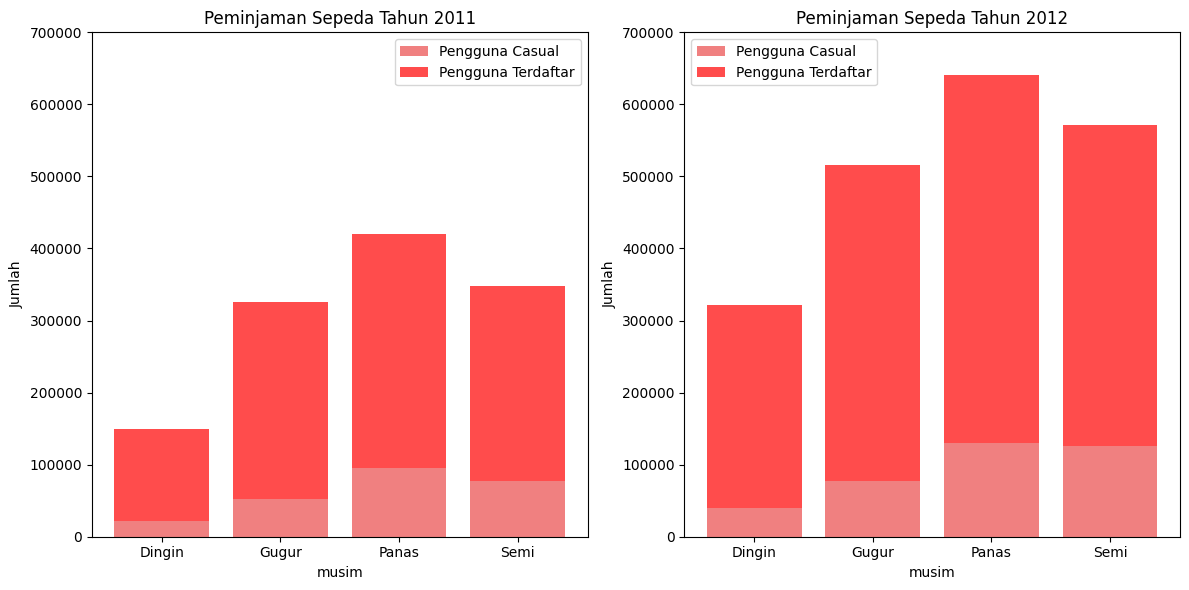

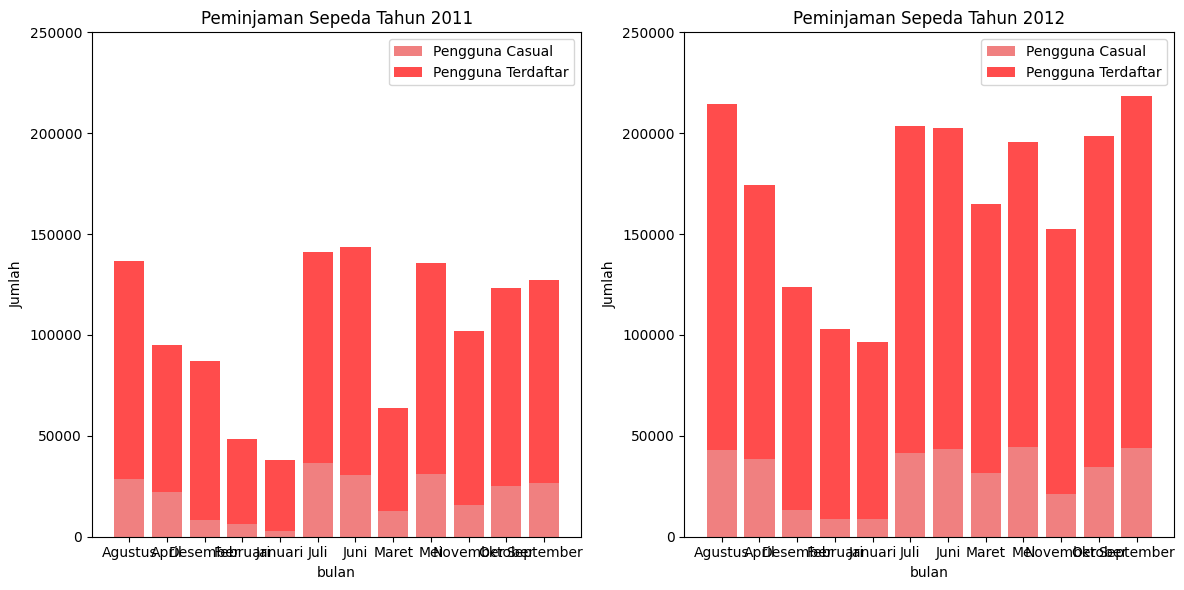

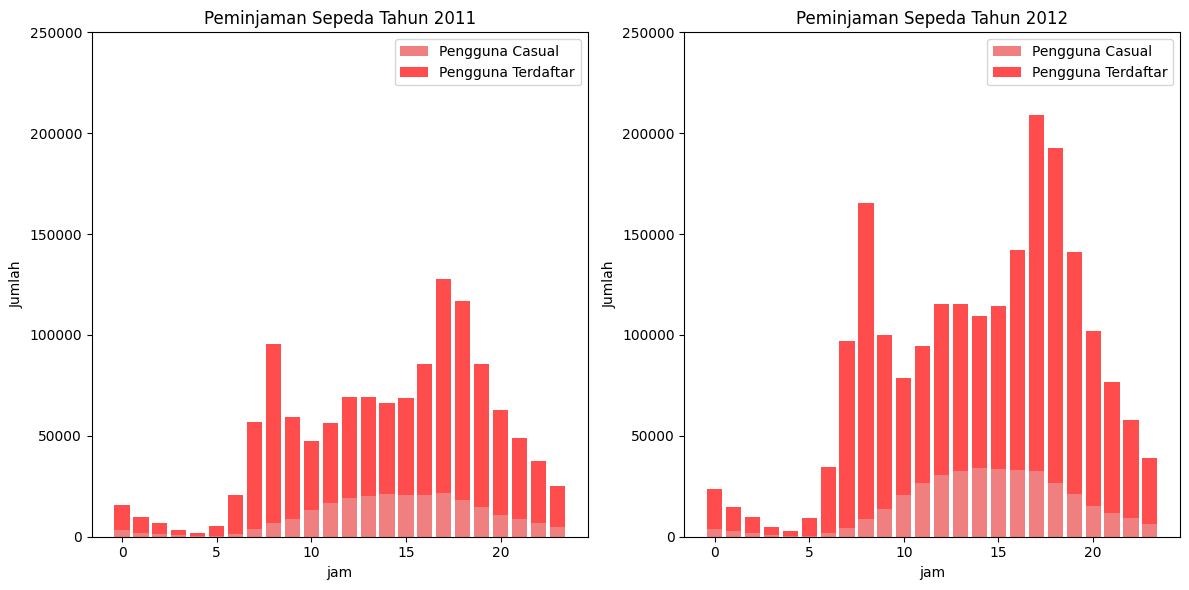

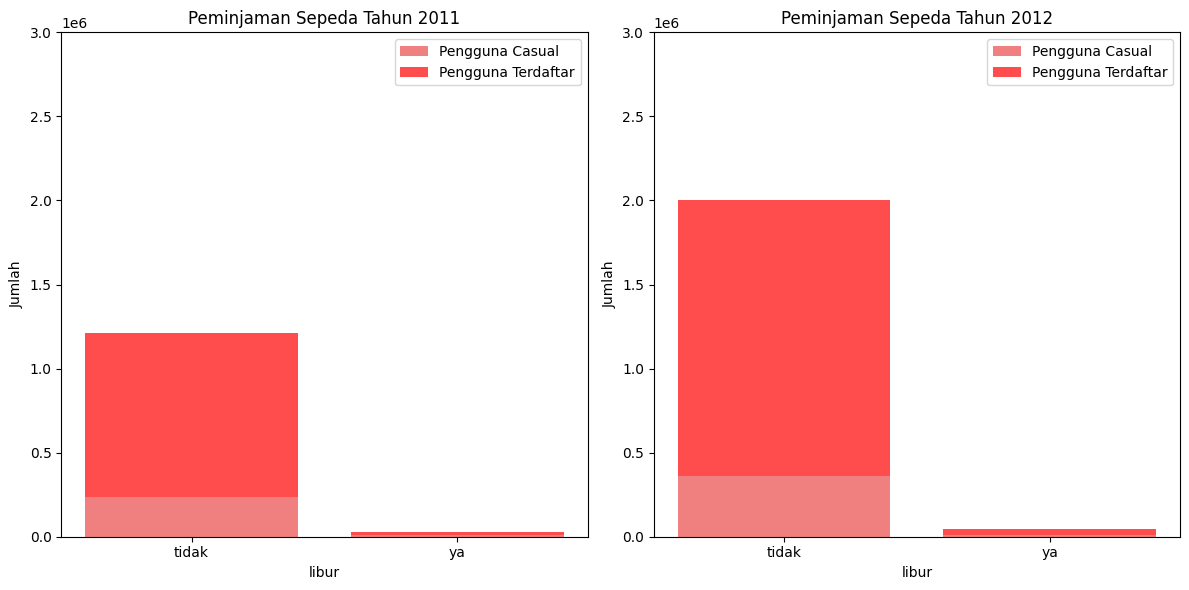

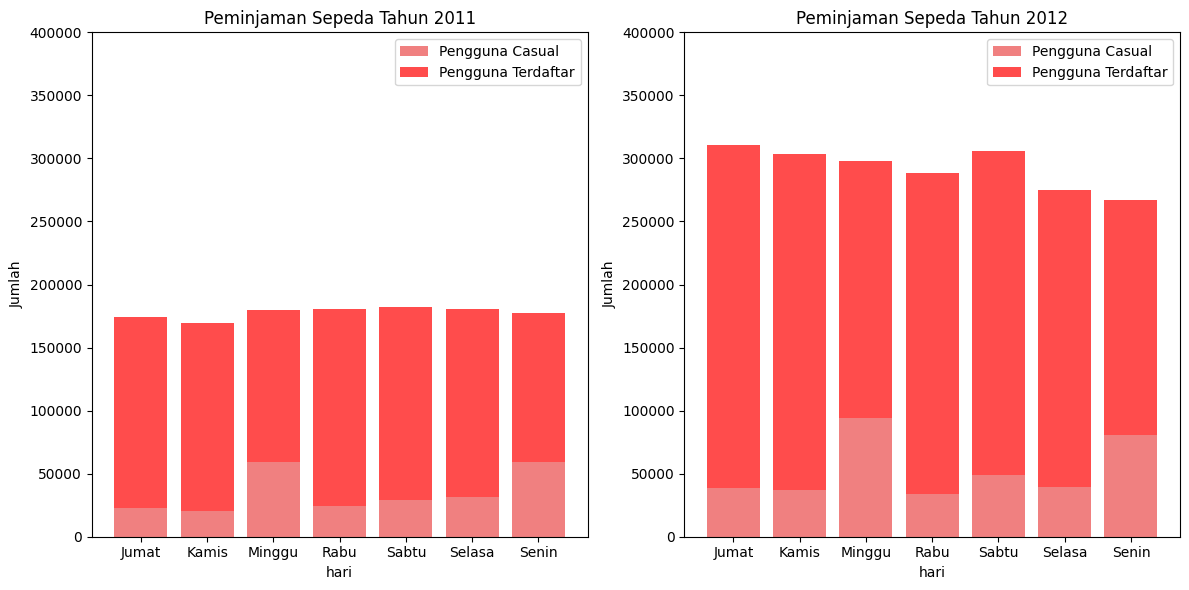

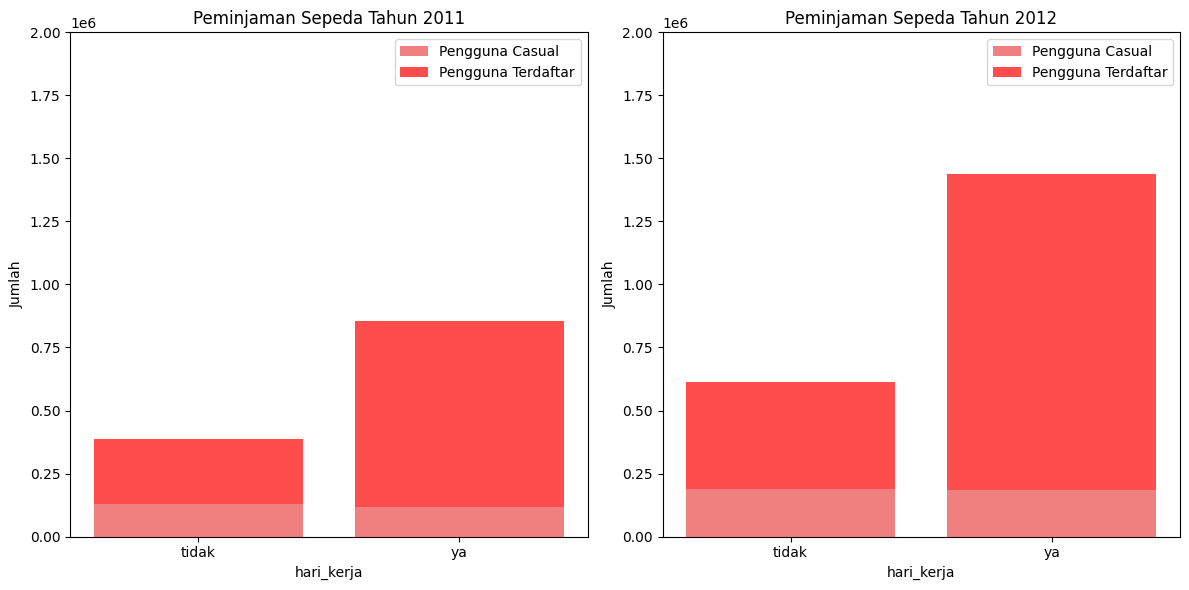

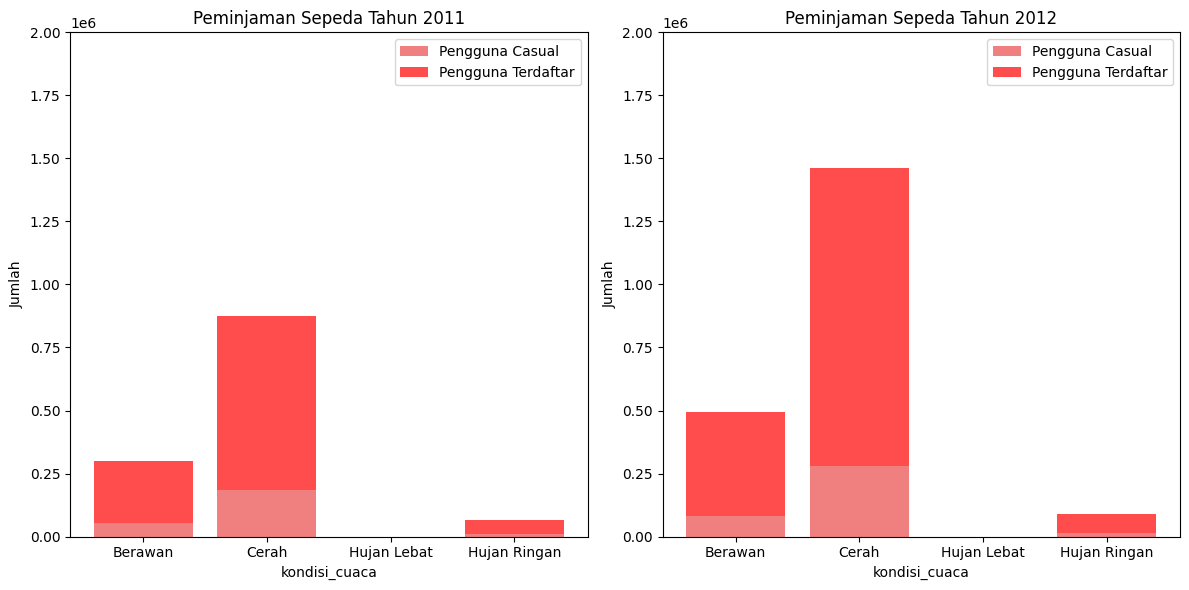

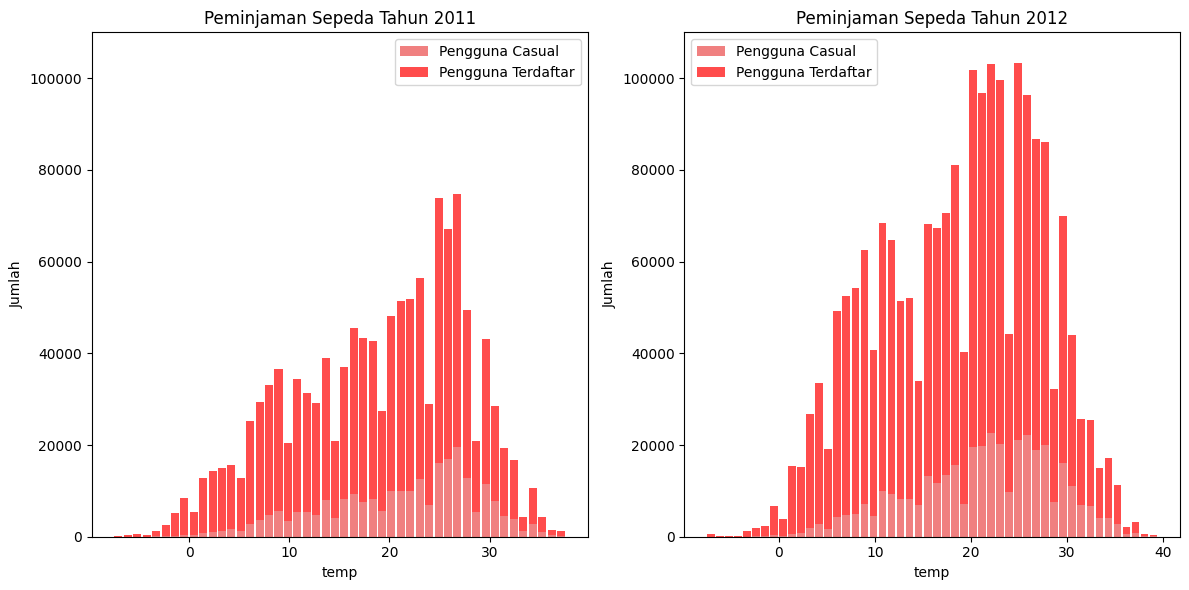

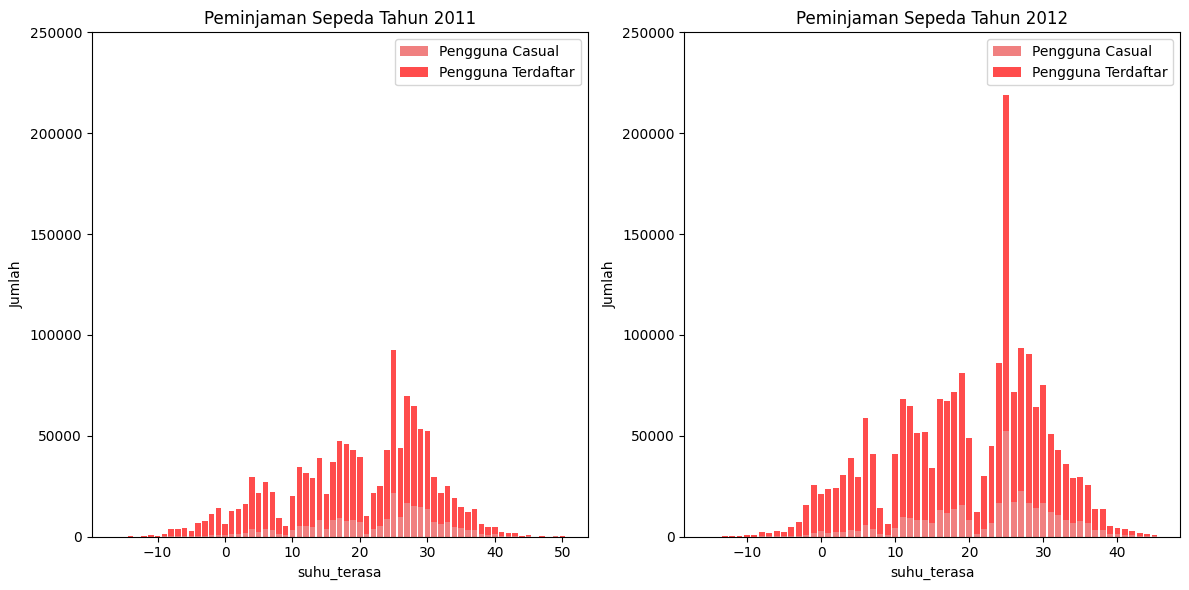

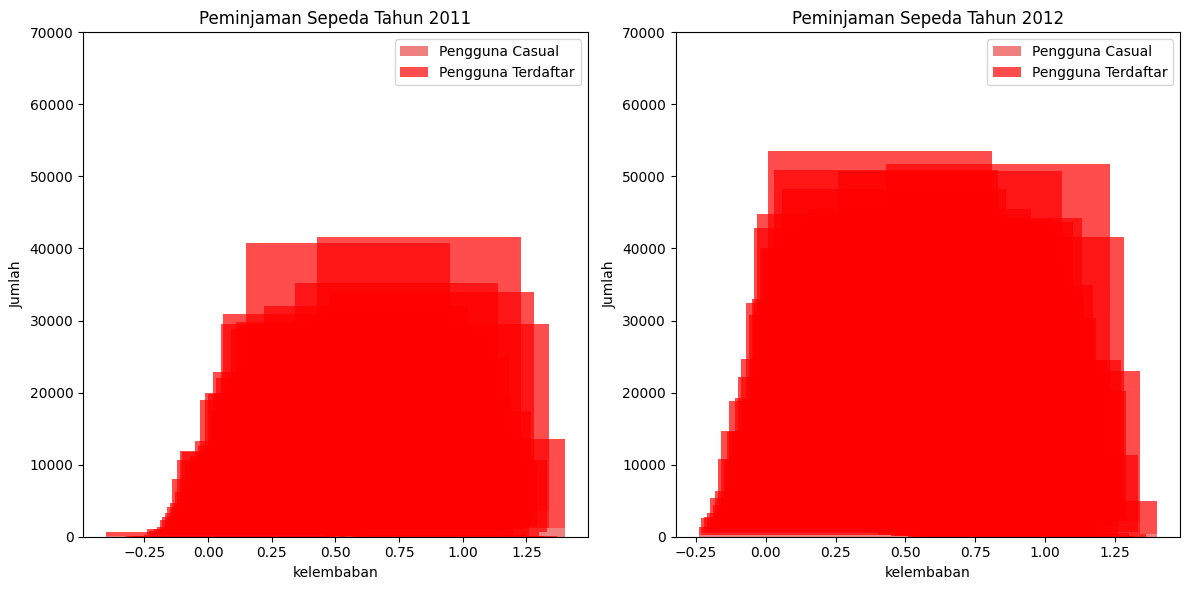

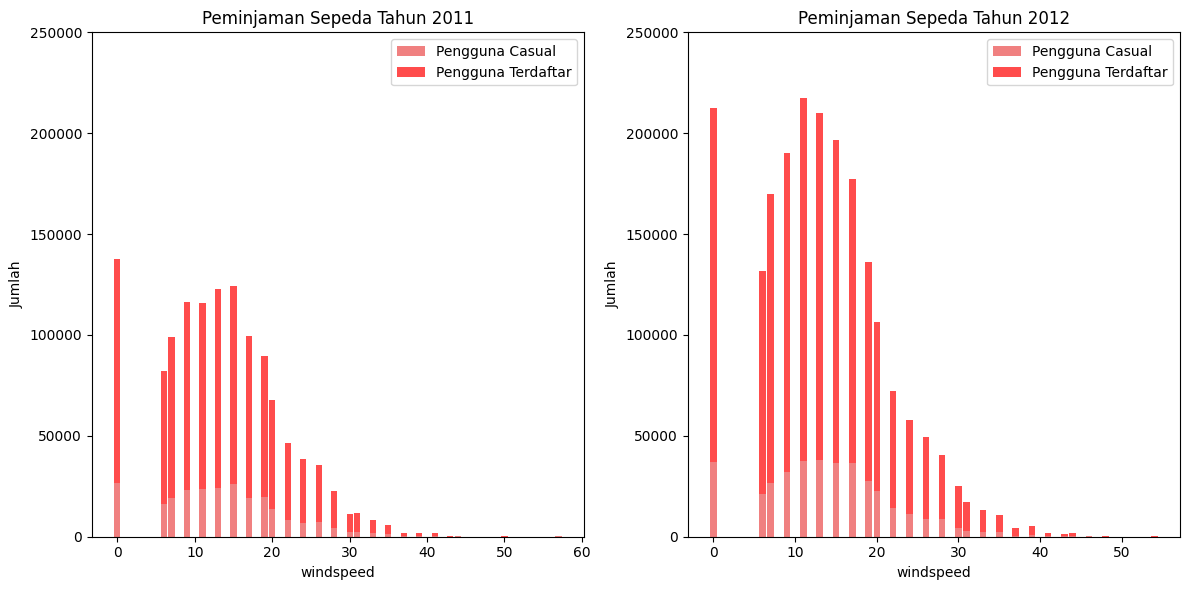

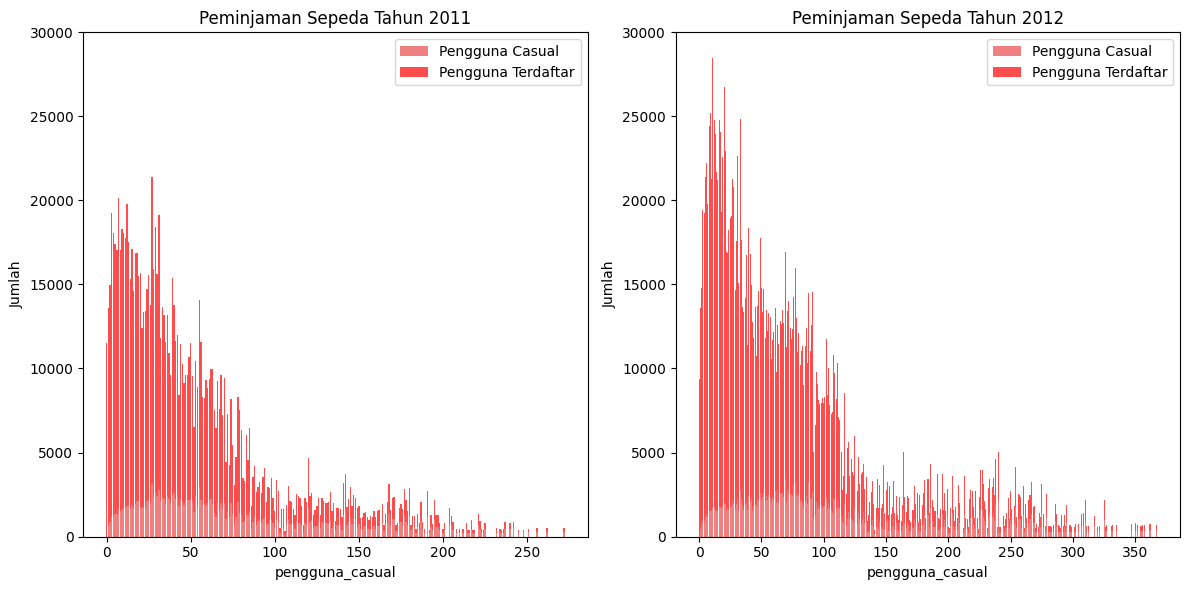

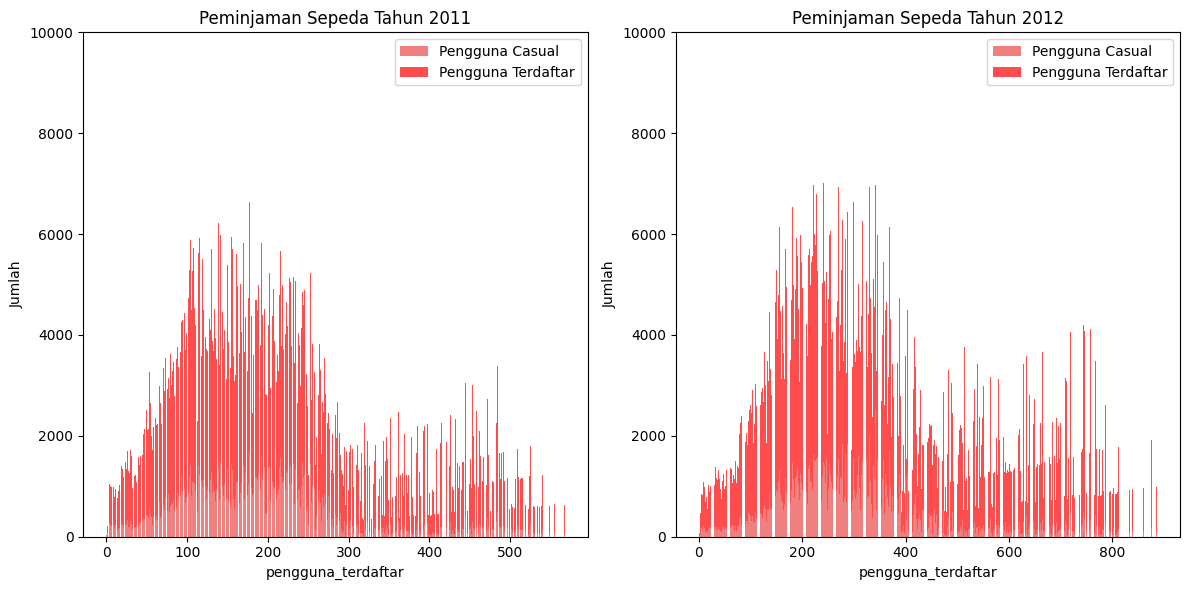

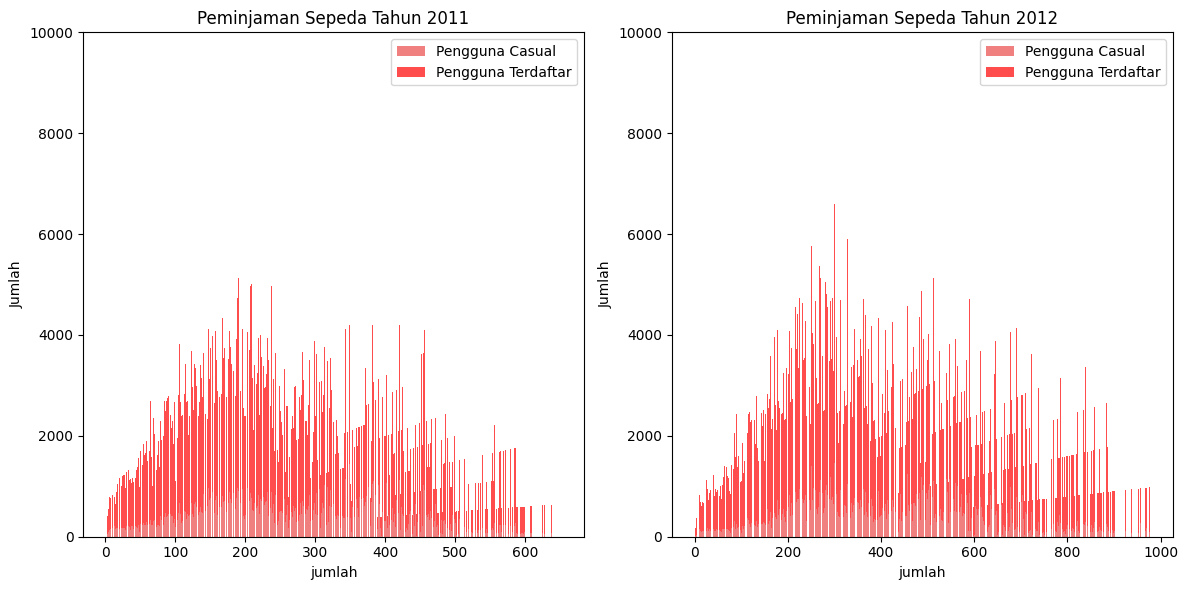

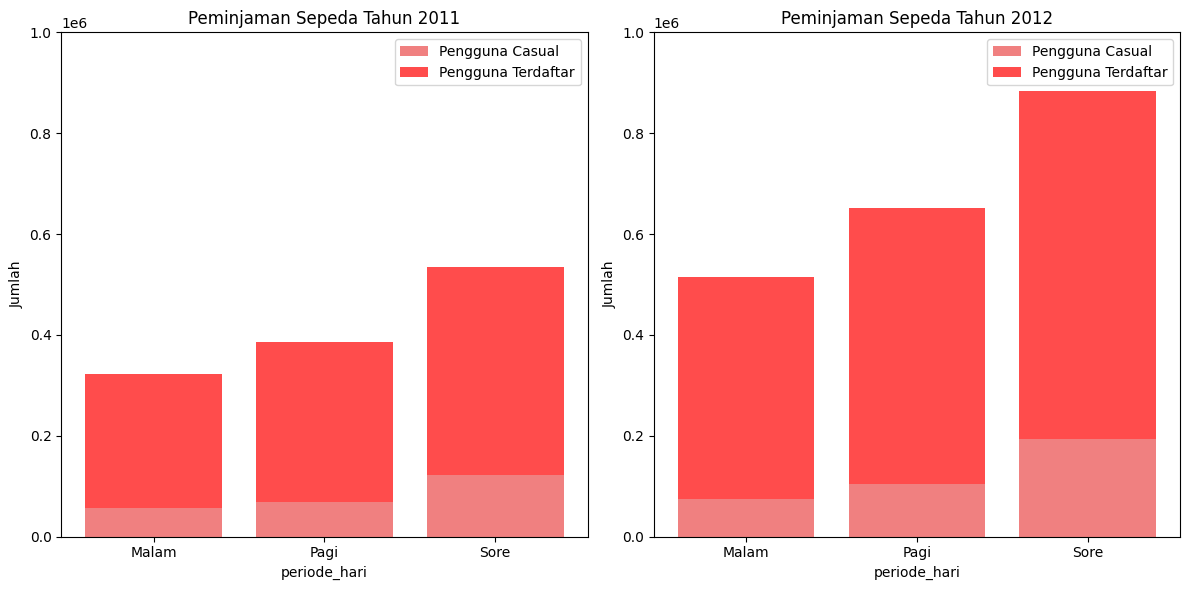

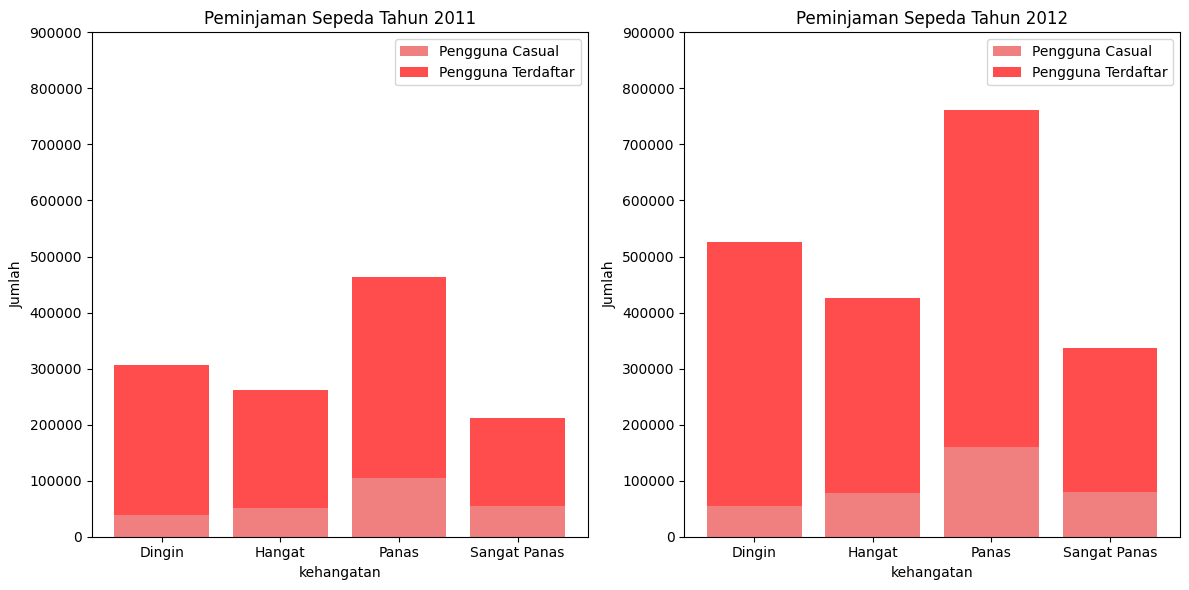

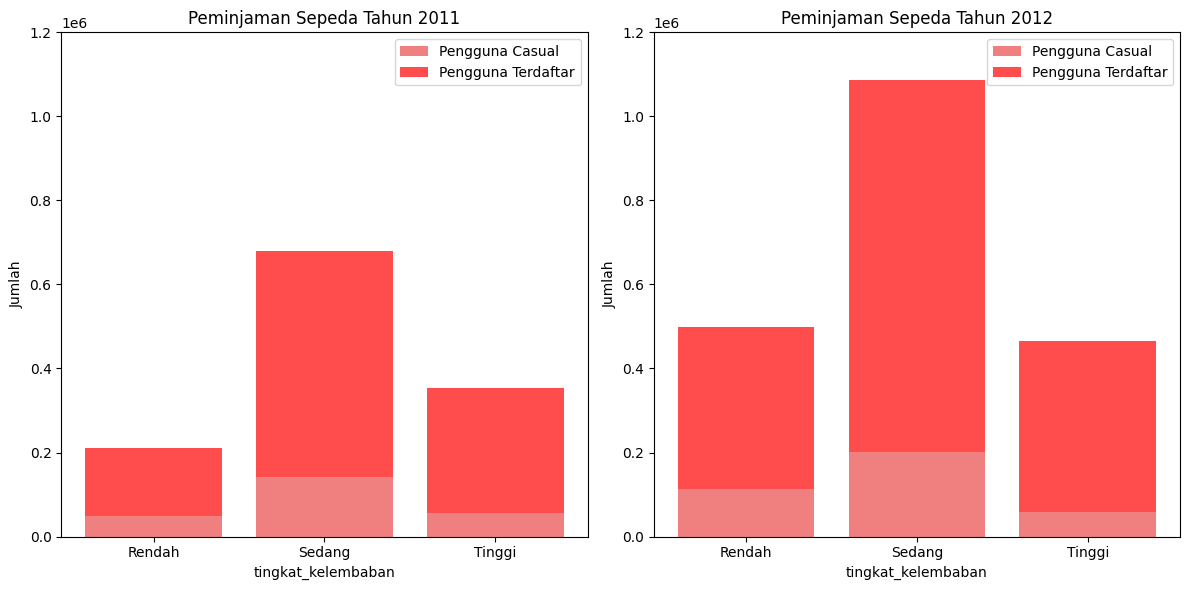

In [8]:
# Menggunakan fungsi analisis_variabel untuk memplot peminjaman sepeda pada 2011 dan 2012 dari semua kolom
analisis_variabel(rentals_2011, rentals_2012, 'musim', 700000)
analisis_variabel(rentals_2011, rentals_2012, 'bulan', 250000)
analisis_variabel(rentals_2011, rentals_2012, 'jam', 250000)
analisis_variabel(rentals_2011, rentals_2012, 'libur', 3000000)
analisis_variabel(rentals_2011, rentals_2012, 'hari', 400000)
analisis_variabel(rentals_2011, rentals_2012, 'hari_kerja', 2000000)
analisis_variabel(rentals_2011, rentals_2012, 'kondisi_cuaca', 2000000)
analisis_variabel(rentals_2011, rentals_2012, 'temp', 110000)
analisis_variabel(rentals_2011, rentals_2012, 'suhu_terasa', 250000)
analisis_variabel(rentals_2011, rentals_2012, 'kelembaban', 70000)
analisis_variabel(rentals_2011, rentals_2012, 'windspeed', 250000)
analisis_variabel(rentals_2011, rentals_2012, 'pengguna_casual', 30000)
analisis_variabel(rentals_2011, rentals_2012, 'pengguna_terdaftar', 10000)
analisis_variabel(rentals_2011, rentals_2012, 'jumlah', 10000)
analisis_variabel(rentals_2011, rentals_2012, 'periode_hari', 1000000)
analisis_variabel(rentals_2011, rentals_2012, 'kehangatan', 900000)
analisis_variabel(rentals_2011, rentals_2012, 'tingkat_kelembaban', 1200000)


## Analisis per jam berdasarkan Bulan 2011 dan 2012

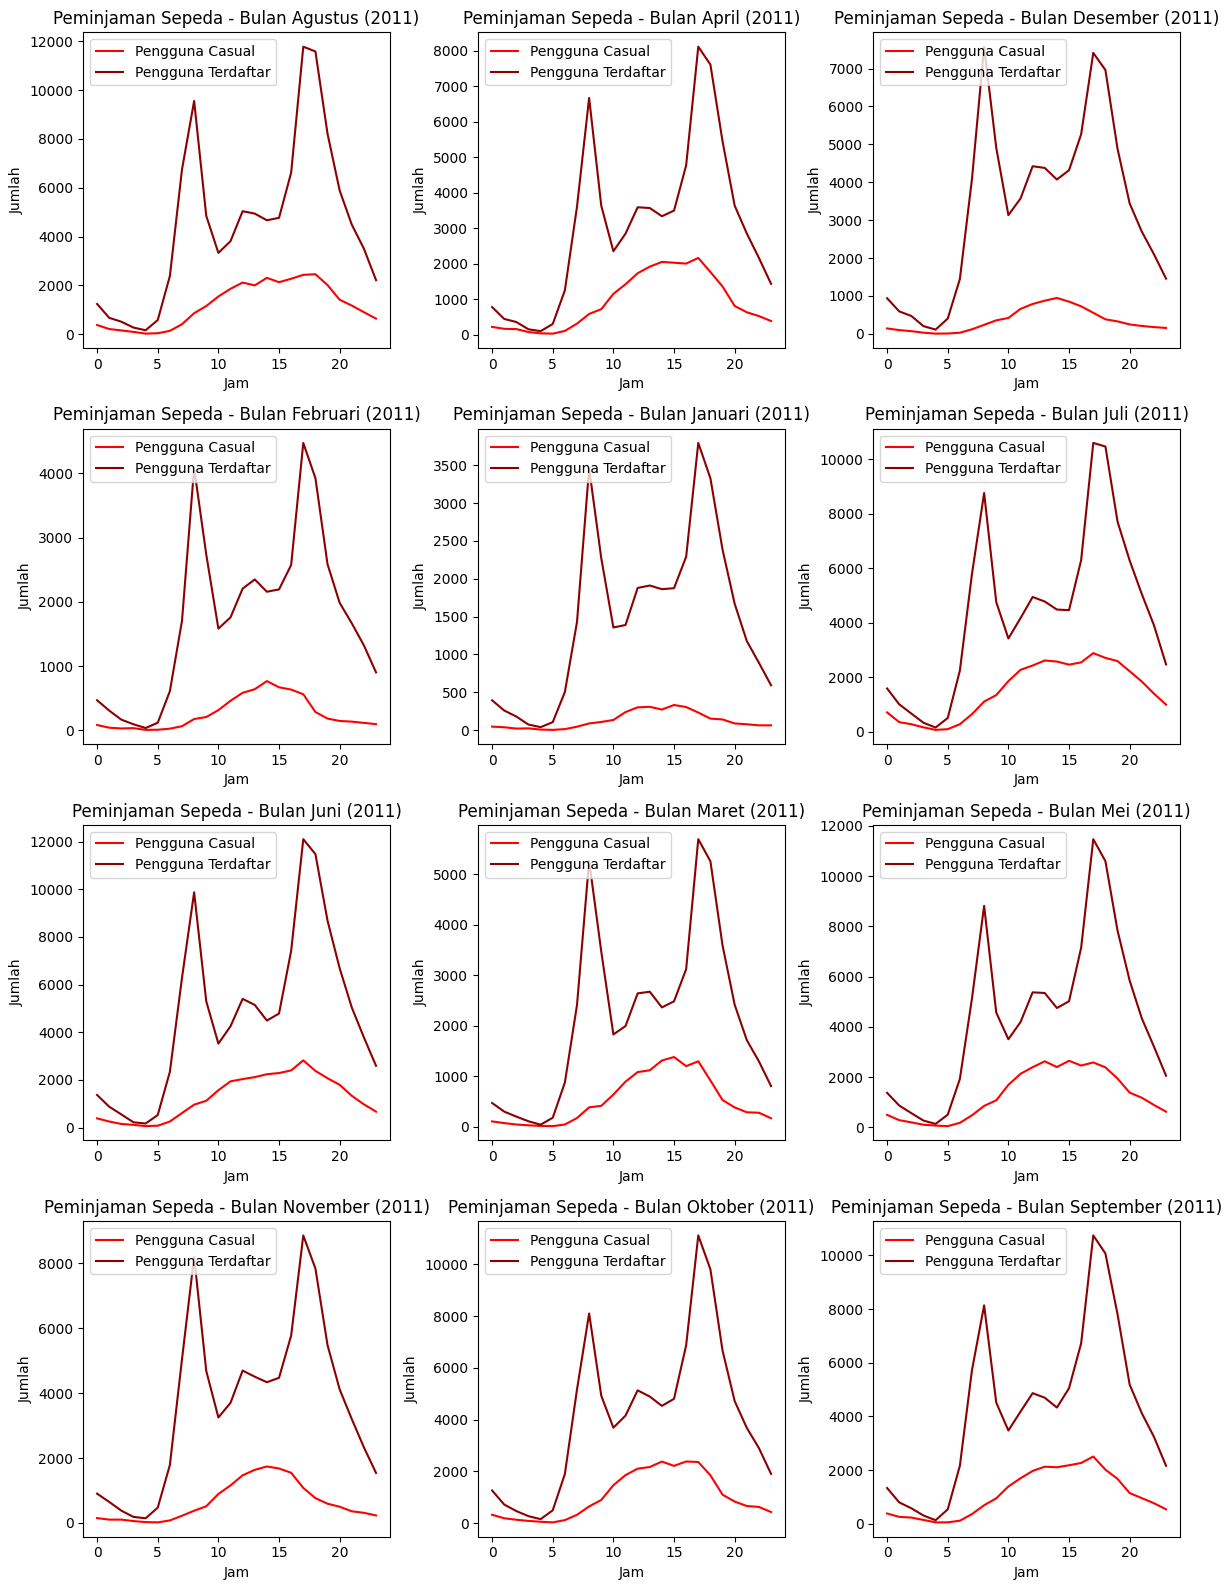

In [9]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2011_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2011].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2011
bulan_2011 = sepeda_2011_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2011 = len(bulan_2011)
ukuran_grid_2011 = (num_bulan_2011 // 3, 3) if num_bulan_2011 % 3 == 0 else (num_bulan_2011 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2011, axes_2011 = plt.subplots(ukuran_grid_2011[0], ukuran_grid_2011[1], figsize=(12, 4 * ukuran_grid_2011[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2011):
    ax_2011 = axes_2011[i // 3, i % 3] if num_bulan_2011 > 1 else axes_2011
    sepeda_bulan_2011 = sepeda_2011_jam.loc[bulan]

    ax_2011.plot(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_casual'], label='Pengguna Casual', color='red')
    ax_2011.plot(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_terdaftar'], label='Pengguna Terdaftar', color='darkred')
    ax_2011.set_xlabel('Jam')
    ax_2011.set_ylabel('Jumlah')
    ax_2011.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2011)')
    ax_2011.legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


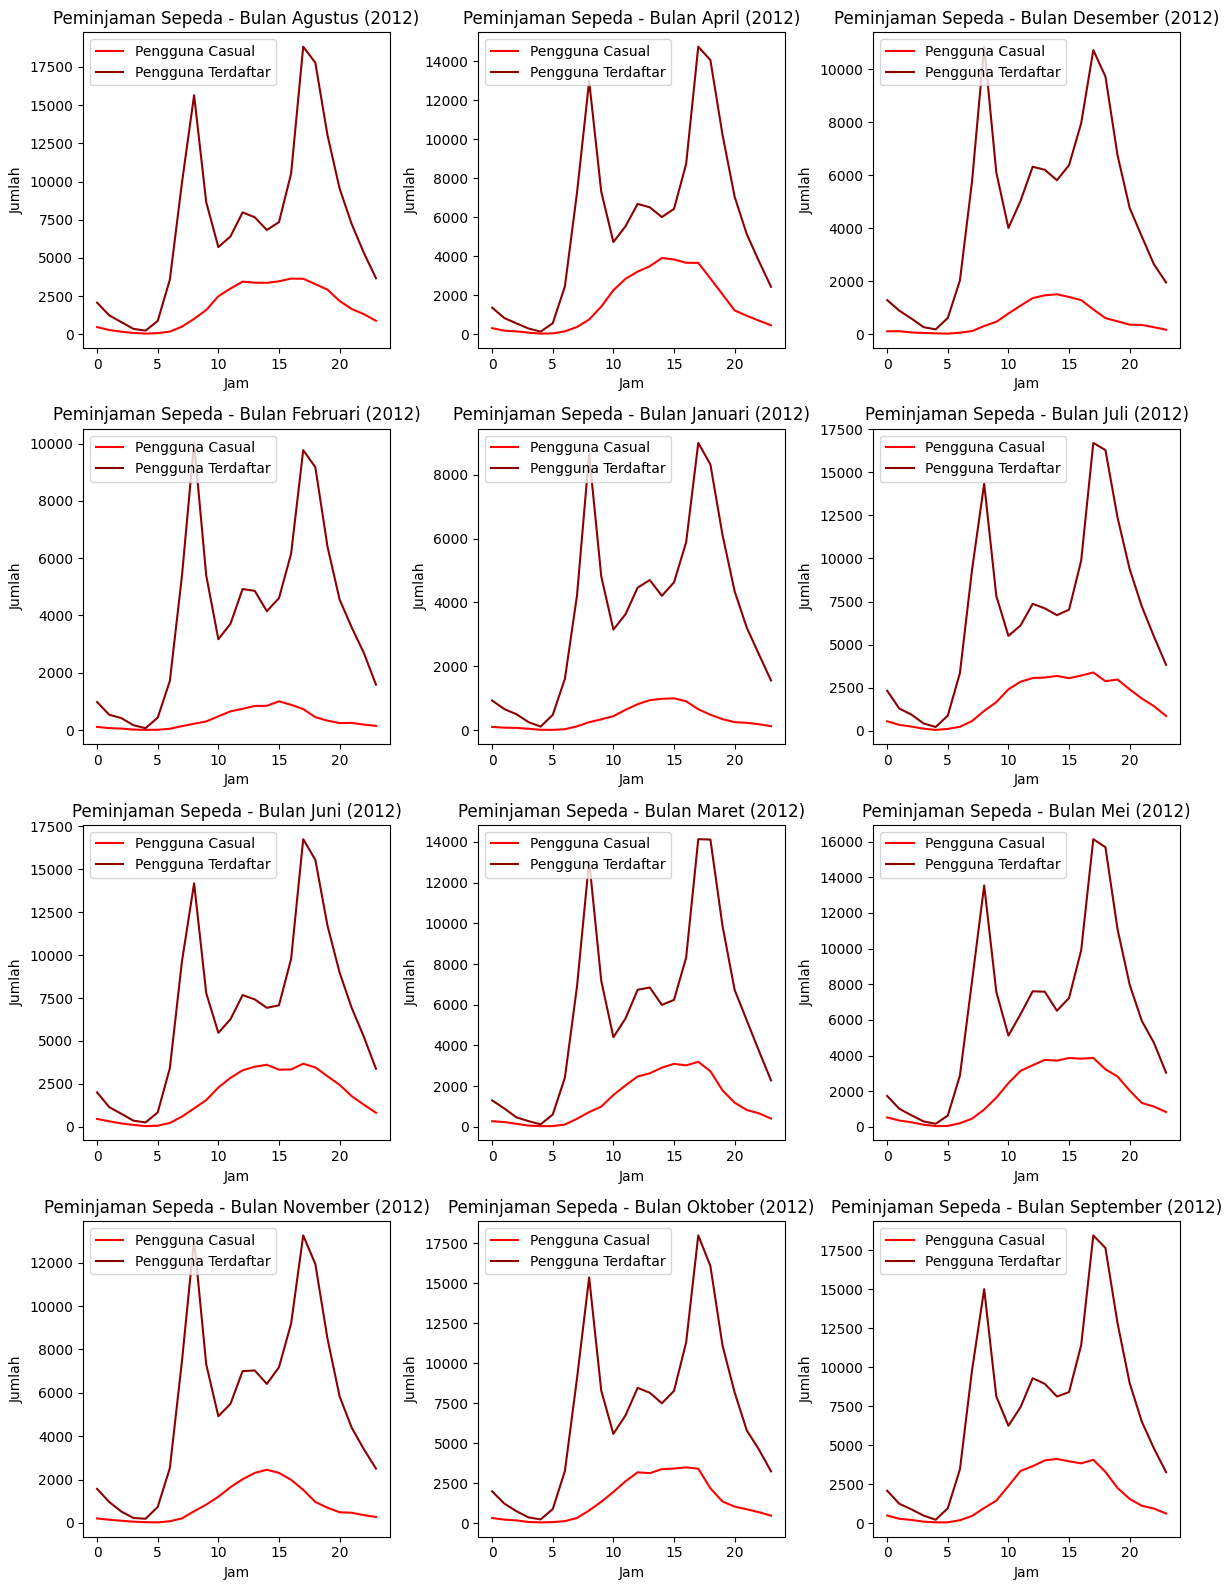

In [10]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2012_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2012].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2012
bulan_2012 = sepeda_2012_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2012 = len(bulan_2012)
ukuran_grid_2012 = (num_bulan_2012 // 3, 3) if num_bulan_2012 % 3 == 0 else (num_bulan_2012 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2012, axes_2012 = plt.subplots(ukuran_grid_2012[0], ukuran_grid_2012[1], figsize=(12, 4 * ukuran_grid_2012[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2012):
    ax_2012 = axes_2012[i // 3, i % 3] if num_bulan_2012 > 1 else axes_2012
    sepeda_bulan_2012 = sepeda_2012_jam.loc[bulan]

    ax_2012.plot(sepeda_bulan_2012.index.get_level_values('jam'), sepeda_bulan_2012['pengguna_casual'], label='Pengguna Casual', color='red')
    ax_2012.plot(sepeda_bulan_2012.index.get_level_values('jam'), sepeda_bulan_2012['pengguna_terdaftar'], label='Pengguna Terdaftar', color='darkred')
    ax_2012.set_xlabel('Jam')
    ax_2012.set_ylabel('Jumlah')
    ax_2012.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2012)')
    ax_2012.legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


## Analisis per hari berdasarkan Bulan 2011 dan 2012

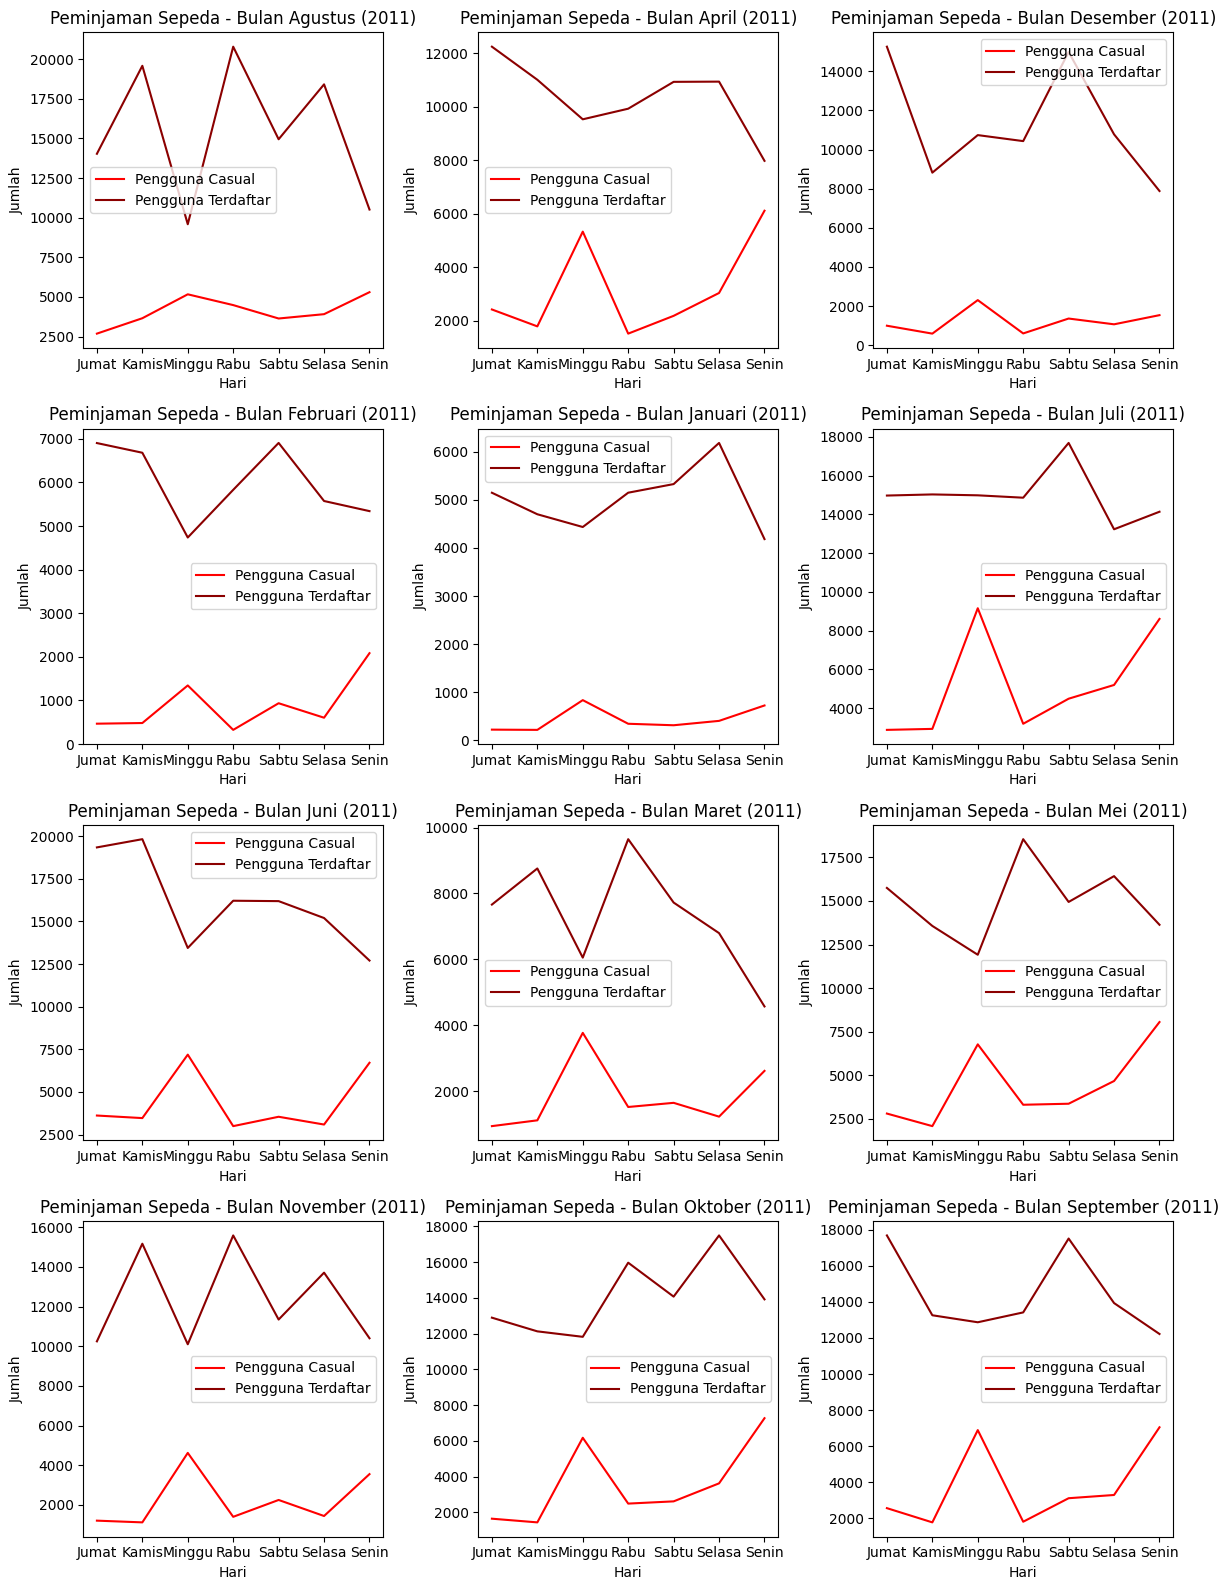

In [11]:
# Mengelompokkan data berdasarkan bulan, hari, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2011_hari = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2011].groupby(['bulan', 'hari'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2011
bulan_2011 = sepeda_2011_hari.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2011 = len(bulan_2011)
ukuran_grid_2011 = (num_bulan_2011 // 3, 3) if num_bulan_2011 % 3 == 0 else (num_bulan_2011 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2011, axes_2011 = plt.subplots(ukuran_grid_2011[0], ukuran_grid_2011[1], figsize=(12, 4 * ukuran_grid_2011[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per hari dalam subplot terpisah
for i, bulan in enumerate(bulan_2011):
    ax_2011 = axes_2011[i // 3, i % 3] if num_bulan_2011 > 1 else axes_2011
    sepeda_bulan_2011 = sepeda_2011_hari.loc[bulan]

    ax_2011.plot(sepeda_bulan_2011.index.get_level_values('hari'), sepeda_bulan_2011['pengguna_casual'], label='Pengguna Casual', color='red')
    ax_2011.plot(sepeda_bulan_2011.index.get_level_values('hari'), sepeda_bulan_2011['pengguna_terdaftar'], label='Pengguna Terdaftar', color='darkred')
    ax_2011.set_xlabel('Hari')
    ax_2011.set_ylabel('Jumlah')
    ax_2011.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2011)')
    ax_2011.legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


## Analisis Scatter Plot per jam berdasarkan Bulan 2011 dan 2012

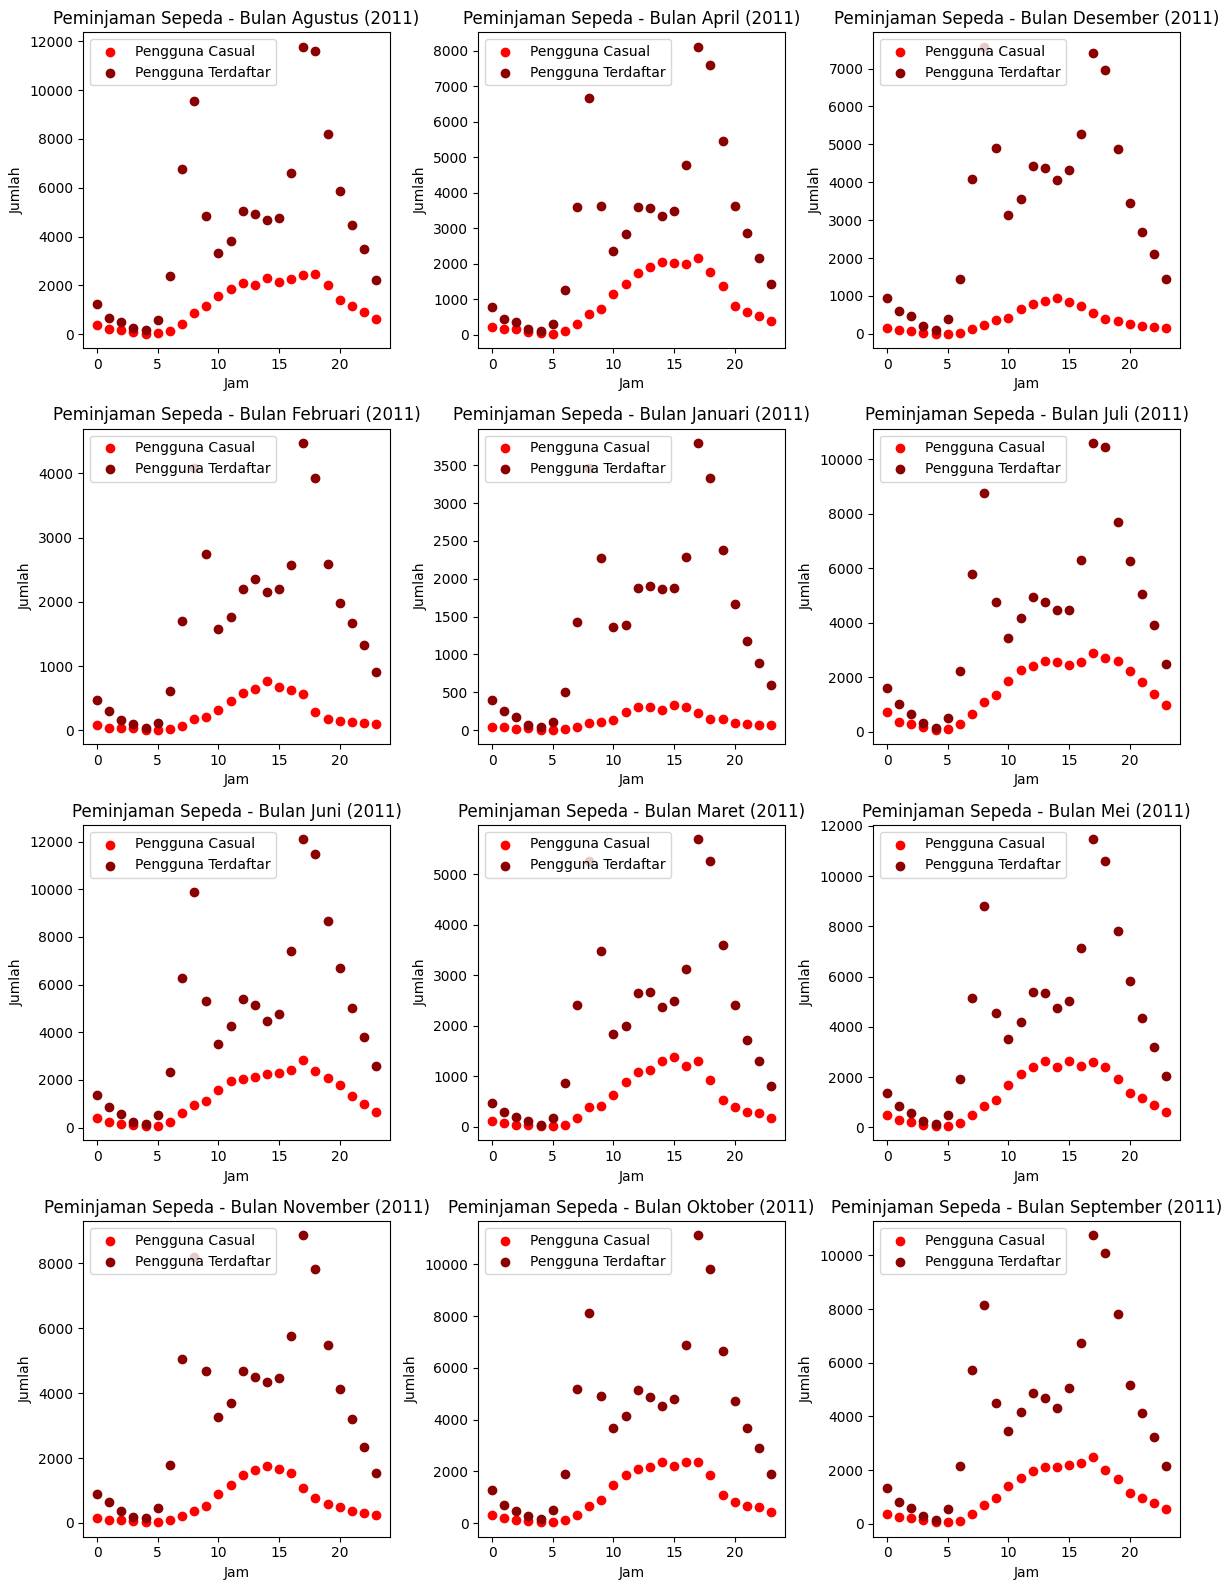

In [13]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2011_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2011].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2011
bulan_2011 = sepeda_2011_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2011 = len(bulan_2011)
ukuran_grid_2011 = (num_bulan_2011 // 3, 3) if num_bulan_2011 % 3 == 0 else (num_bulan_2011 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2011, axes_2011 = plt.subplots(ukuran_grid_2011[0], ukuran_grid_2011[1], figsize=(12, 4 * ukuran_grid_2011[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2011):
    ax_2011 = axes_2011[i // 3, i % 3] if num_bulan_2011 > 1 else axes_2011
    sepeda_bulan_2011 = sepeda_2011_jam.loc[bulan]

    ax_2011.scatter(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_casual'], label='Pengguna Casual', color='red')
    ax_2011.scatter(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_terdaftar'], label='Pengguna Terdaftar', color='darkred')
    ax_2011.set_xlabel('Jam')
    ax_2011.set_ylabel('Jumlah')
    ax_2011.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2011)')
    ax_2011.legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


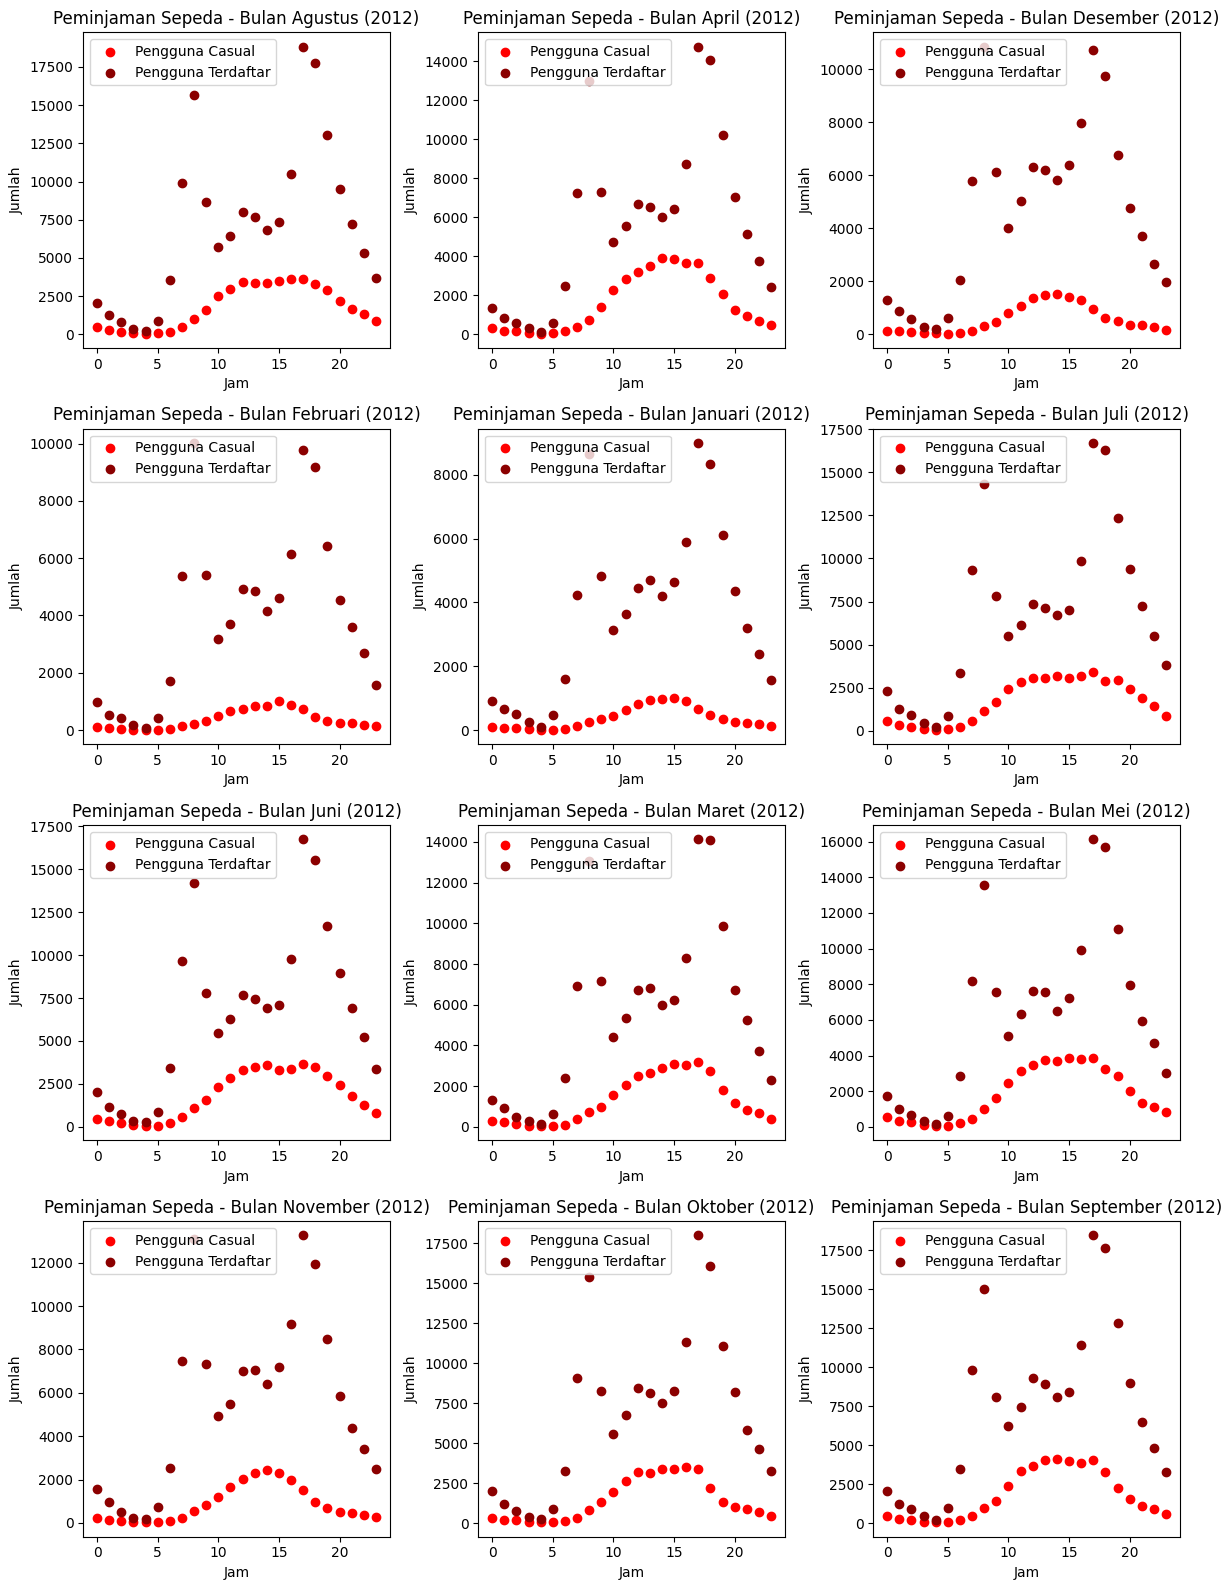

In [14]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2011_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2012].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2011
bulan_2011 = sepeda_2011_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2011 = len(bulan_2011)
ukuran_grid_2011 = (num_bulan_2011 // 3, 3) if num_bulan_2011 % 3 == 0 else (num_bulan_2011 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2011, axes_2011 = plt.subplots(ukuran_grid_2011[0], ukuran_grid_2011[1], figsize=(12, 4 * ukuran_grid_2011[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2011):
    ax_2011 = axes_2011[i // 3, i % 3] if num_bulan_2011 > 1 else axes_2011
    sepeda_bulan_2011 = sepeda_2011_jam.loc[bulan]

    ax_2011.scatter(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_casual'], label='Pengguna Casual', color='red')
    ax_2011.scatter(sepeda_bulan_2011.index.get_level_values('jam'), sepeda_bulan_2011['pengguna_terdaftar'], label='Pengguna Terdaftar', color='darkred')
    ax_2011.set_xlabel('Jam')
    ax_2011.set_ylabel('Jumlah')
    ax_2011.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2012)')
    ax_2011.legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


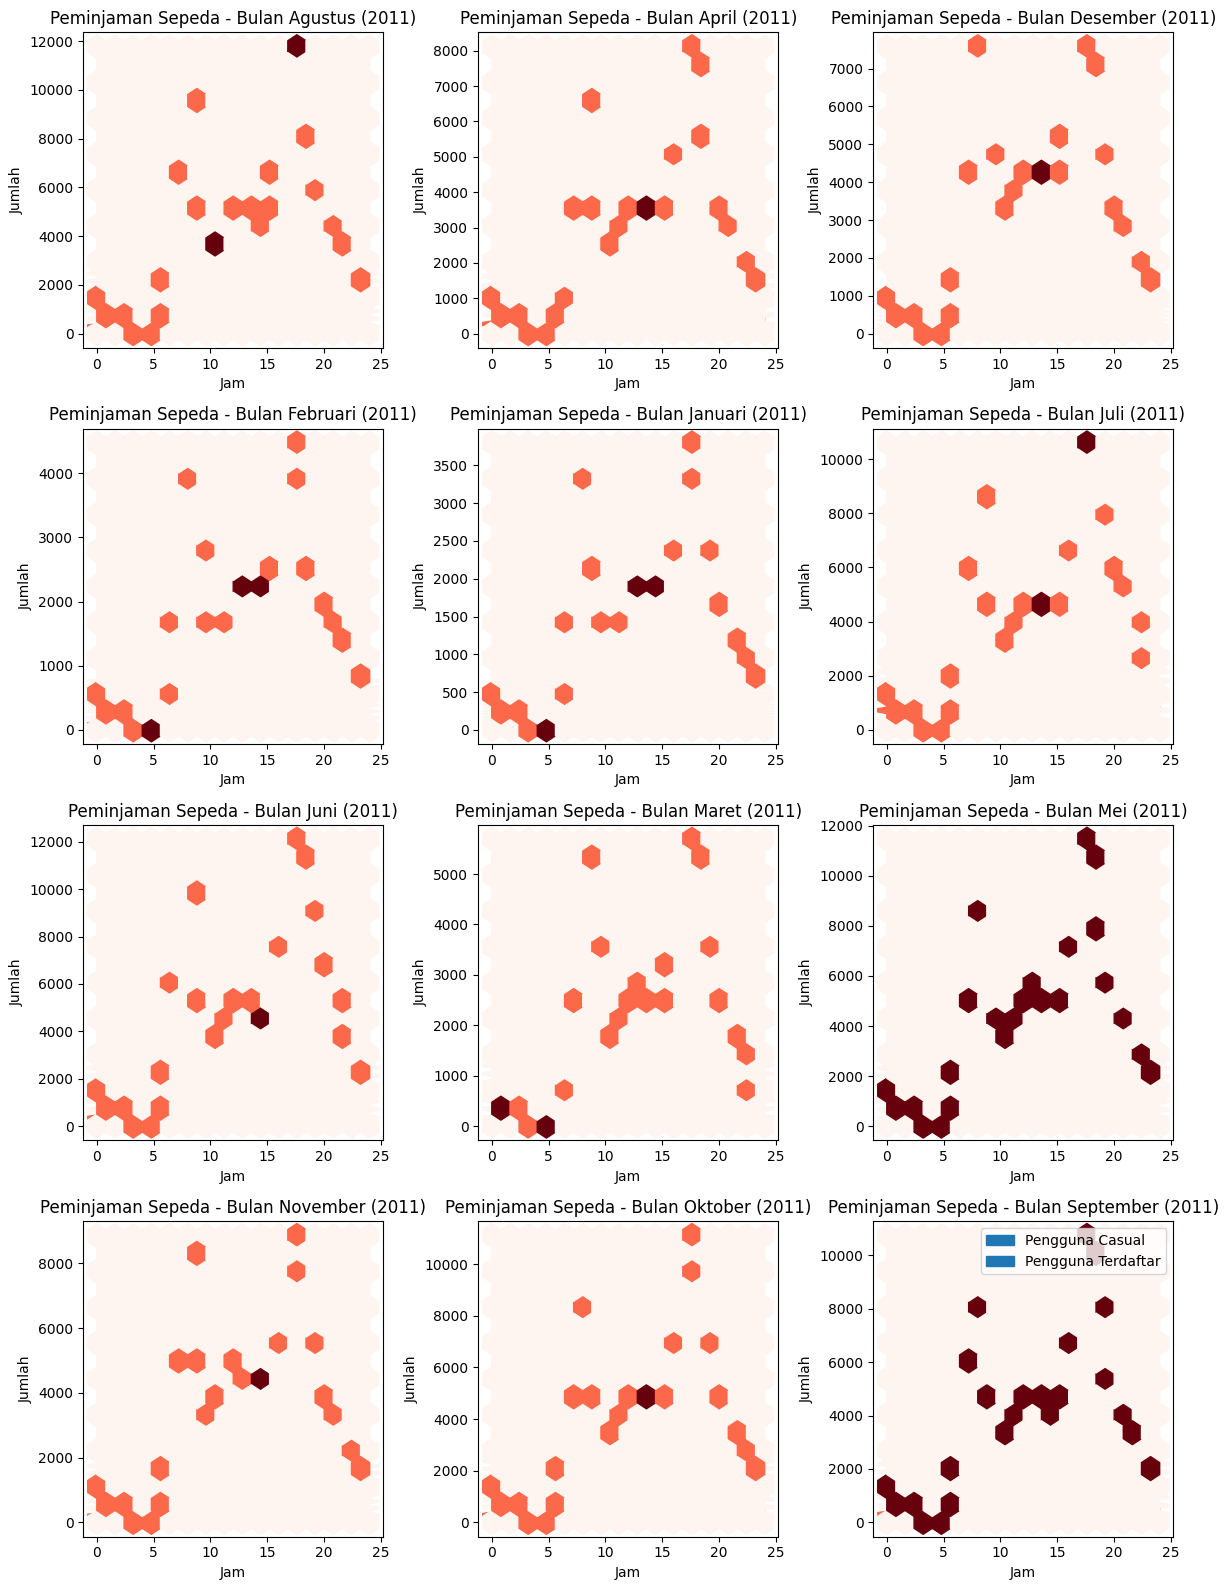

In [19]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2011_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2011].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2011
bulan_2011 = sepeda_2011_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2011 = len(bulan_2011)
ukuran_grid_2011 = (num_bulan_2011 // 3, 3) if num_bulan_2011 % 3 == 0 else (num_bulan_2011 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2011, axes_2011 = plt.subplots(ukuran_grid_2011[0], ukuran_grid_2011[1], figsize=(12, 4 * ukuran_grid_2011[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2011):
    ax_2011 = axes_2011[i // 3, i % 3] if num_bulan_2011 > 1 else axes_2011
    sepeda_bulan_2011 = sepeda_2011_jam.loc[bulan]

    hb = ax_2011.hexbin(sepeda_bulan_2011.index.get_level_values('jam'),
                        sepeda_bulan_2011['pengguna_casual'],
                        gridsize=15, cmap='Reds', extent=[0, 24, 0, sepeda_bulan_2011['pengguna_casual'].max()],
                        label='Pengguna Casual')
    
    ax_2011.hexbin(sepeda_bulan_2011.index.get_level_values('jam'),
                   sepeda_bulan_2011['pengguna_terdaftar'],
                   gridsize=15, cmap='Reds', extent=[0, 24, 0, sepeda_bulan_2011['pengguna_terdaftar'].max()],
                   label='Pengguna Terdaftar')
    
    ax_2011.set_xlabel('Jam')
    ax_2011.set_ylabel('Jumlah')
    ax_2011.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2011)')

# Menambahkan legend pada subplot terakhir
axes_2011[-1, -1].legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


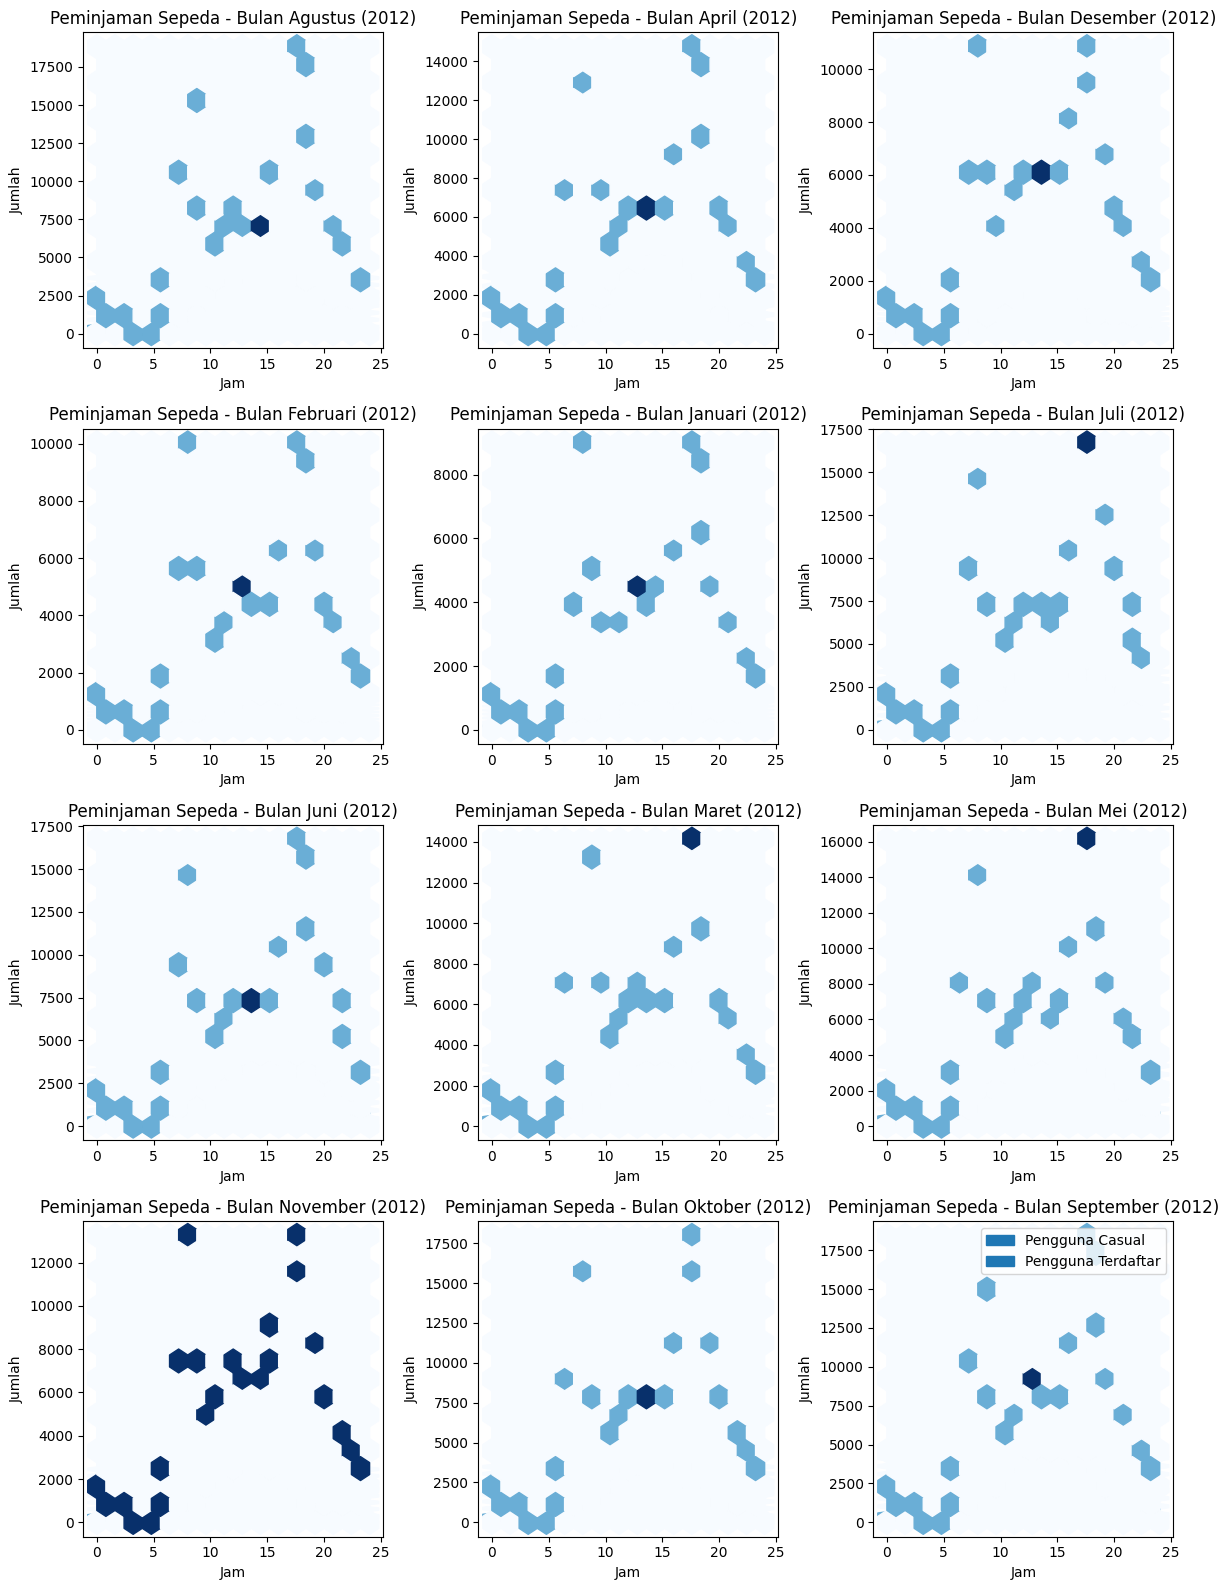

In [20]:
# Mengelompokkan data berdasarkan bulan, jam, pengguna casual, dan pengguna terdaftar serta menghitung total peminjaman
sepeda_2012_jam = sewa_cuaca_waktu[sewa_cuaca_waktu['tahun'] == 2012].groupby(['bulan', 'jam'])[['pengguna_casual', 'pengguna_terdaftar']].sum()

# Membuat daftar bulan unik dalam data 2012
bulan_2012 = sepeda_2012_jam.index.get_level_values('bulan').unique()

# Menentukan ukuran grid berdasarkan jumlah bulan
num_bulan_2012 = len(bulan_2012)
ukuran_grid_2012 = (num_bulan_2012 // 3, 3) if num_bulan_2012 % 3 == 0 else (num_bulan_2012 // 3 + 1, 3)

# Membuat figur dengan subplot
fig_2012, axes_2012 = plt.subplots(ukuran_grid_2012[0], ukuran_grid_2012[1], figsize=(12, 4 * ukuran_grid_2012[0]))

# Mengulang setiap bulan dan memplot jumlah peminjaman per jam dalam subplot terpisah
for i, bulan in enumerate(bulan_2012):
    ax_2012 = axes_2012[i // 3, i % 3] if num_bulan_2012 > 1 else axes_2012
    sepeda_bulan_2012 = sepeda_2012_jam.loc[bulan]

    hb = ax_2012.hexbin(sepeda_bulan_2012.index.get_level_values('jam'),
                        sepeda_bulan_2012['pengguna_casual'],
                        gridsize=15, cmap='Blues', extent=[0, 24, 0, sepeda_bulan_2012['pengguna_casual'].max()],
                        label='Pengguna Casual')
    
    ax_2012.hexbin(sepeda_bulan_2012.index.get_level_values('jam'),
                   sepeda_bulan_2012['pengguna_terdaftar'],
                   gridsize=15, cmap='Blues', extent=[0, 24, 0, sepeda_bulan_2012['pengguna_terdaftar'].max()],
                   label='Pengguna Terdaftar')
    
    ax_2012.set_xlabel('Jam')
    ax_2012.set_ylabel('Jumlah')
    ax_2012.set_title(f'Peminjaman Sepeda - Bulan {bulan} (2012)')

# Menambahkan legend pada subplot terakhir
axes_2012[-1, -1].legend()

# Menyesuaikan jarak antara subplot
plt.tight_layout()

# Menampilkan figur
plt.show()


C:\Users\ACHMAD RAFFI\AppData\Local\Temp\ipykernel_5468\1884512382.py:6: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=df, x='jam', y='pengguna_casual', cmap="Reds" if year == 2011 else "Blues", fill=True, thresh=0, levels=100, bw=.15)


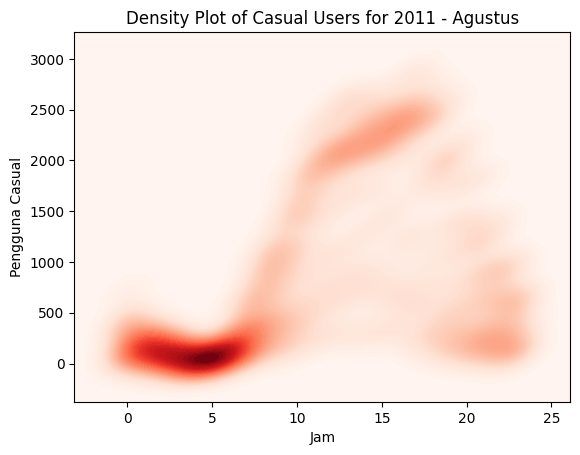

C:\Users\ACHMAD RAFFI\AppData\Local\Temp\ipykernel_5468\1884512382.py:6: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=df, x='jam', y='pengguna_casual', cmap="Reds" if year == 2011 else "Blues", fill=True, thresh=0, levels=100, bw=.15)


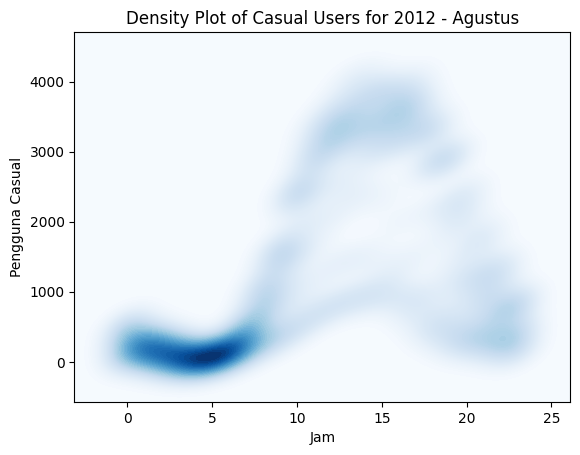

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def density_plot(df, year, max_jumlah):
    # Create a density plot
    sns.kdeplot(data=df, x='jam', y='pengguna_casual', cmap="Reds" if year == 2011 else "Blues", fill=True, thresh=0, levels=100, bw=.15)

    # Set labels and title
    plt.xlabel('Jam')
    plt.ylabel('Pengguna Casual')
    plt.title(f'Density Plot of Casual Users for {year} - {df.index.get_level_values("bulan").unique()[0]}')

    # Show the plot
    plt.show()

# Create density plot for 2011
density_plot(sepeda_2011_jam, 2011, max_jumlah=sepeda_2011_jam['pengguna_casual'].max())

# Create density plot for 2012
density_plot(sepeda_2012_jam, 2012, max_jumlah=sepeda_2012_jam['pengguna_casual'].max())


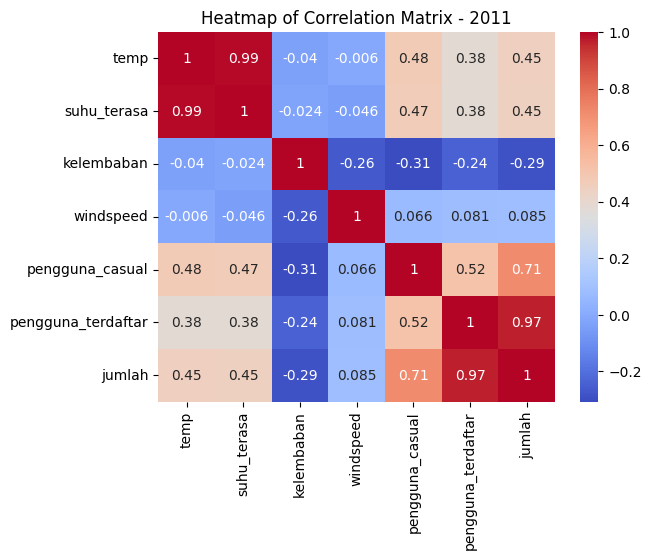

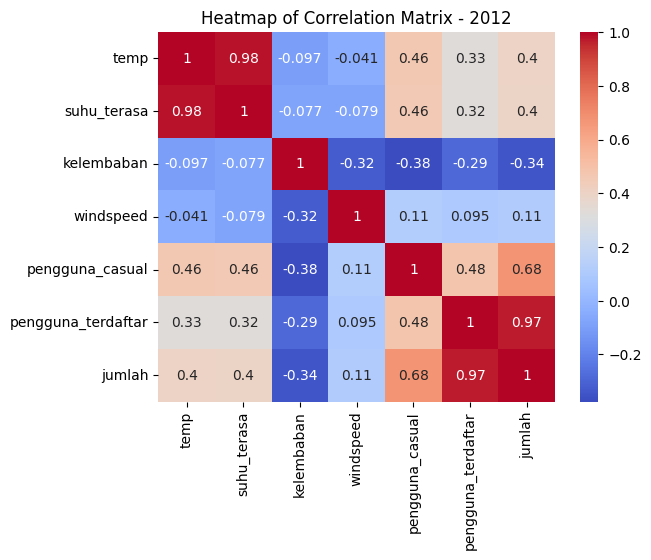

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def heatmap_analysis(df, columns, year):
    # Select relevant columns
    heatmap_data = df[columns]

    # Calculate the correlation matrix
    correlation_matrix = heatmap_data.corr()

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

    # Set the title
    plt.title(f'Heatmap of Correlation Matrix - {year}')

    # Show the plot
    plt.show()

# Specify the columns for the heatmap
columns_to_heatmap = ['temp', 'suhu_terasa', 'kelembaban', 'windspeed', 'pengguna_casual', 'pengguna_terdaftar', 'jumlah']

# Create the heatmap for 2011
heatmap_analysis(rentals_2011, columns_to_heatmap, year=2011)

# Create the heatmap for 2012
heatmap_analysis(rentals_2012, columns_to_heatmap, year=2012)
